# Dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 30, 'axes.titlesize': 40, 'axes.labelsize': 35})

# Load data

In [2]:
train = pd.read_csv('/kaggle/input/google-quest-challenge/train.csv')

category_cols = train['category'].unique()
question_target_cols = ['question_asker_intent_understanding','question_body_critical', 'question_conversational', 
                        'question_expect_short_answer', 'question_fact_seeking', 'question_has_commonly_accepted_answer',
                        'question_interestingness_others', 'question_interestingness_self', 'question_multi_intent', 
                        'question_not_really_a_question', 'question_opinion_seeking', 'question_type_choice',
                        'question_type_compare', 'question_type_consequence', 'question_type_definition', 
                        'question_type_entity', 'question_type_instructions', 'question_type_procedure',
                        'question_type_reason_explanation', 'question_type_spelling', 'question_well_written']
answer_target_cols = ['answer_helpful', 'answer_level_of_information', 'answer_plausible', 'answer_relevance',
                      'answer_satisfaction', 'answer_type_instructions', 'answer_type_procedure', 
                      'answer_type_reason_explanation', 'answer_well_written']
target_cols = question_target_cols + answer_target_cols

print('Train samples: %s' % len(train))
display(train.head())

Train samples: 6079


,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


# Label analysis by category

# Question category analysis

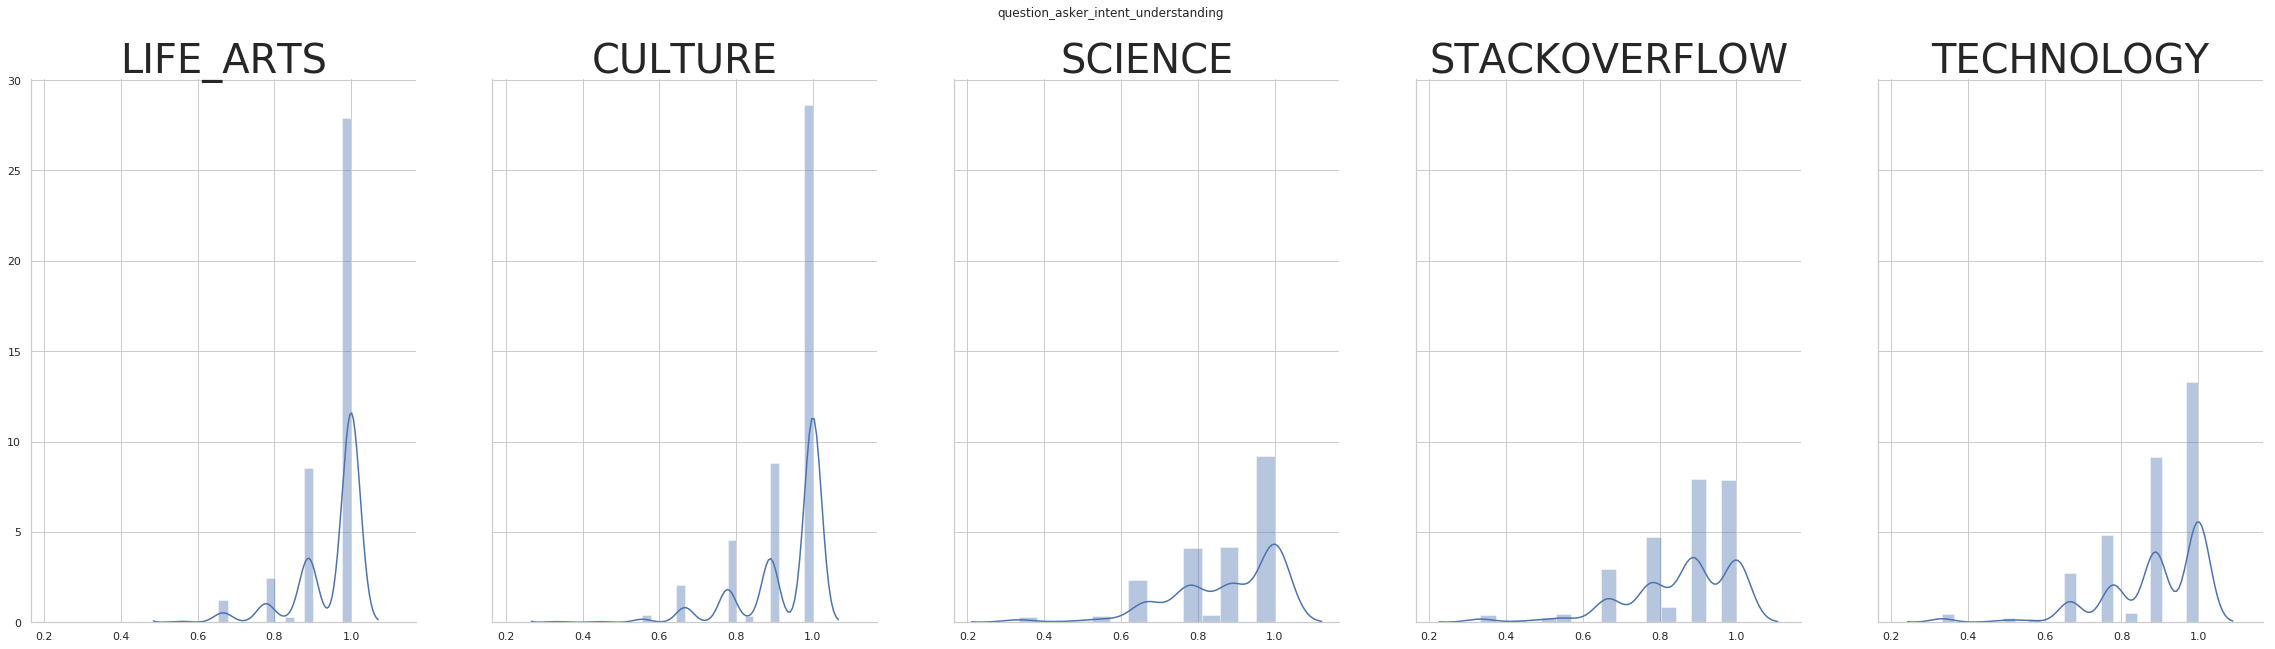

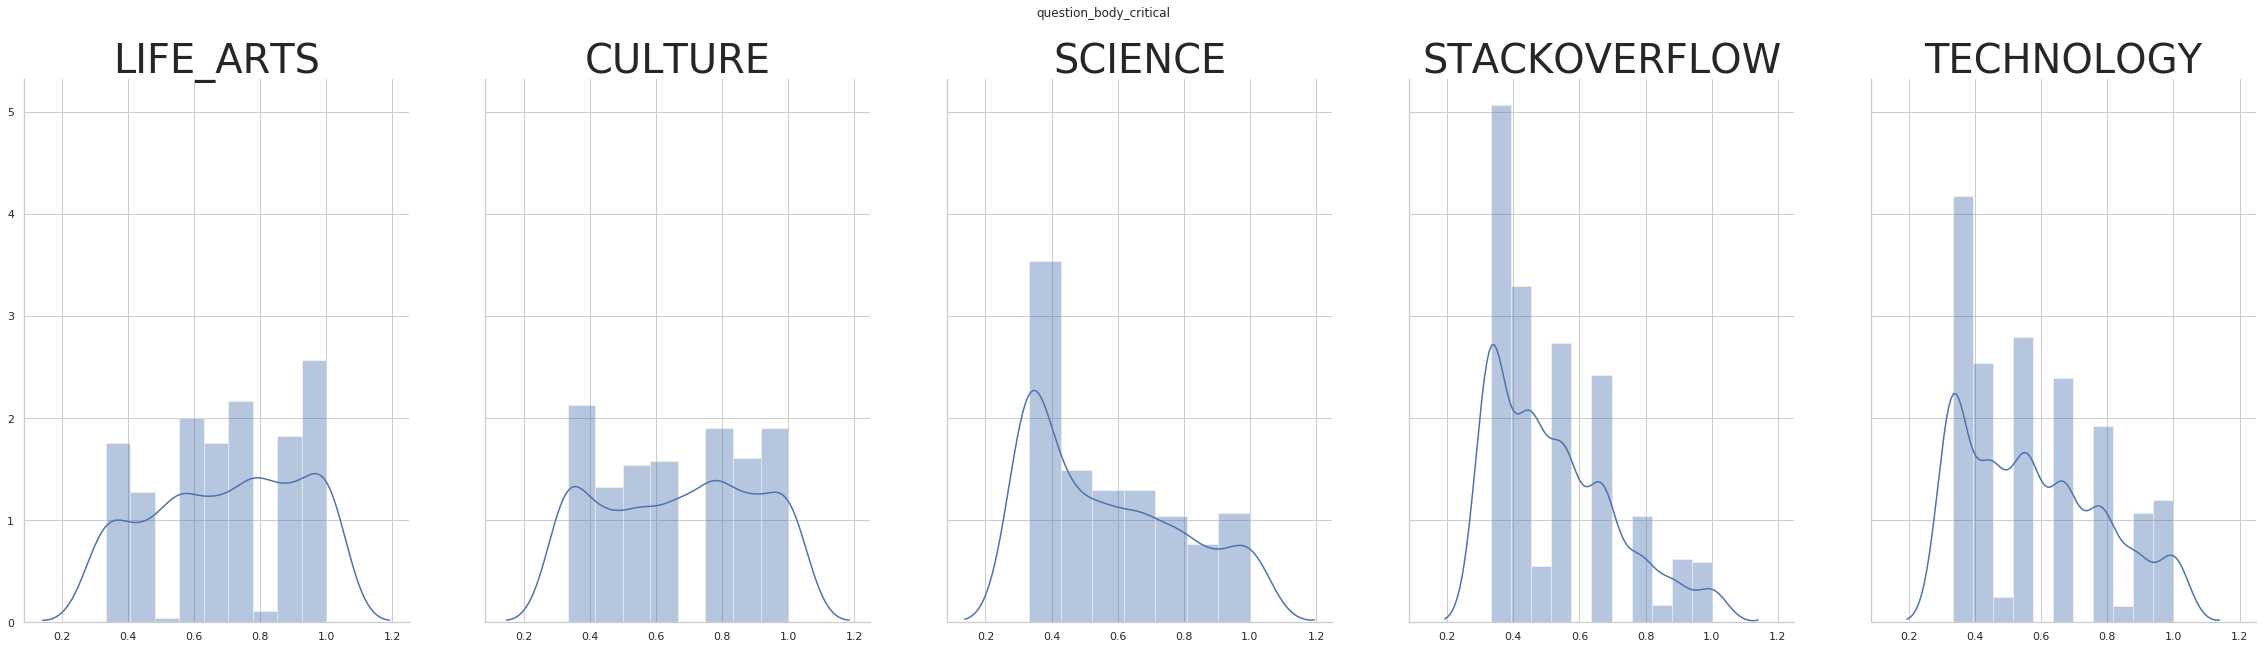

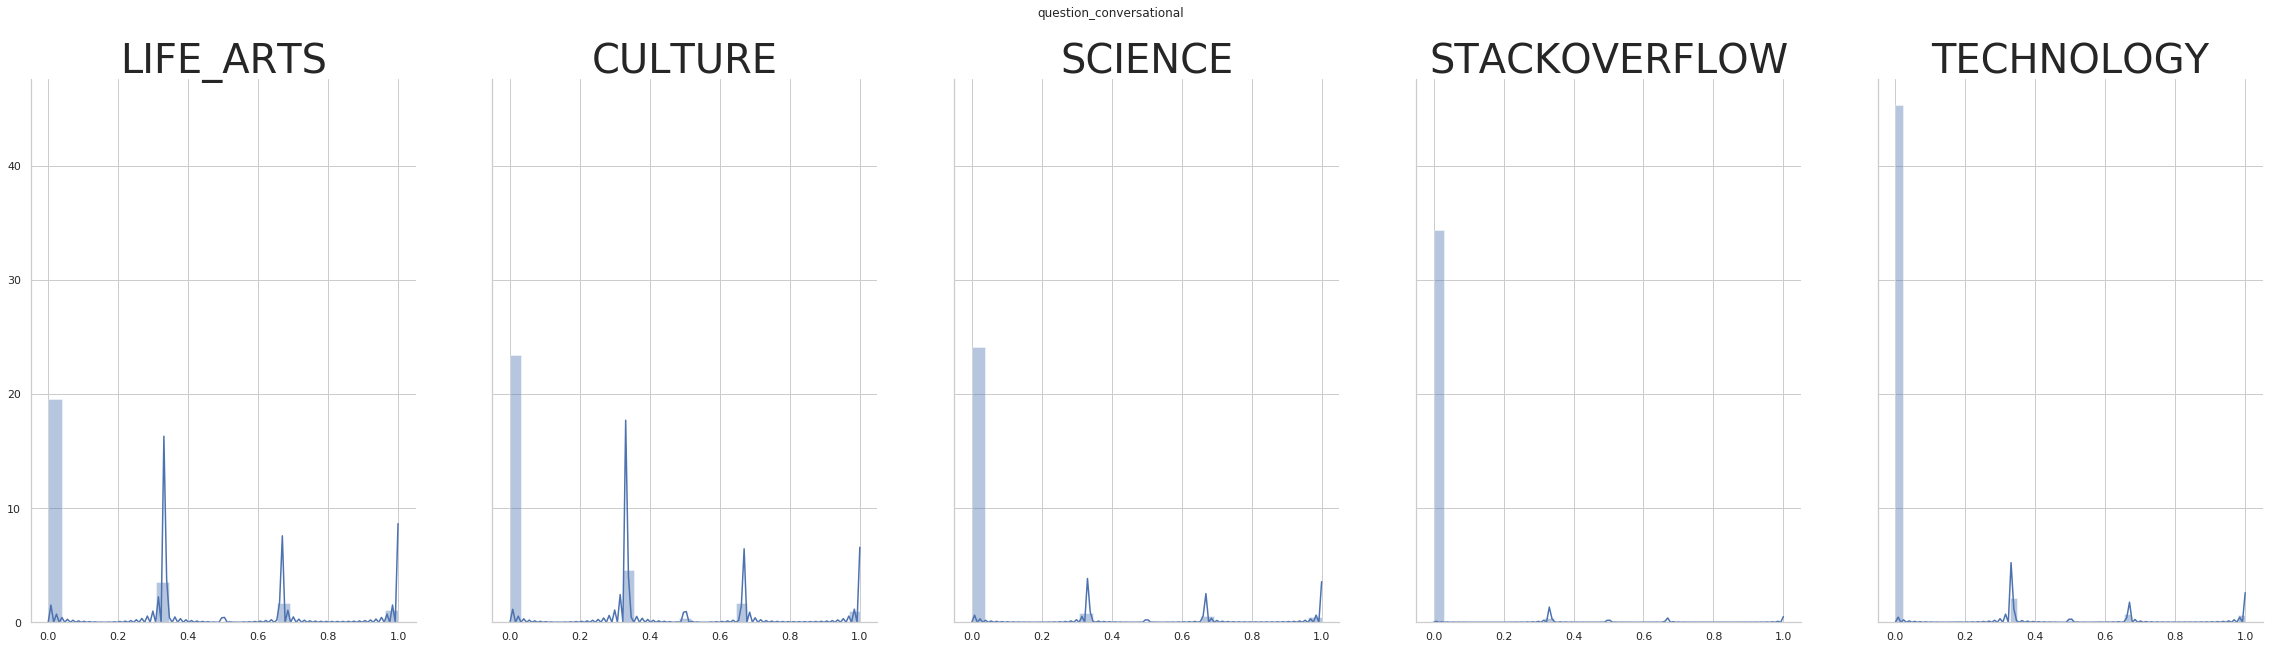

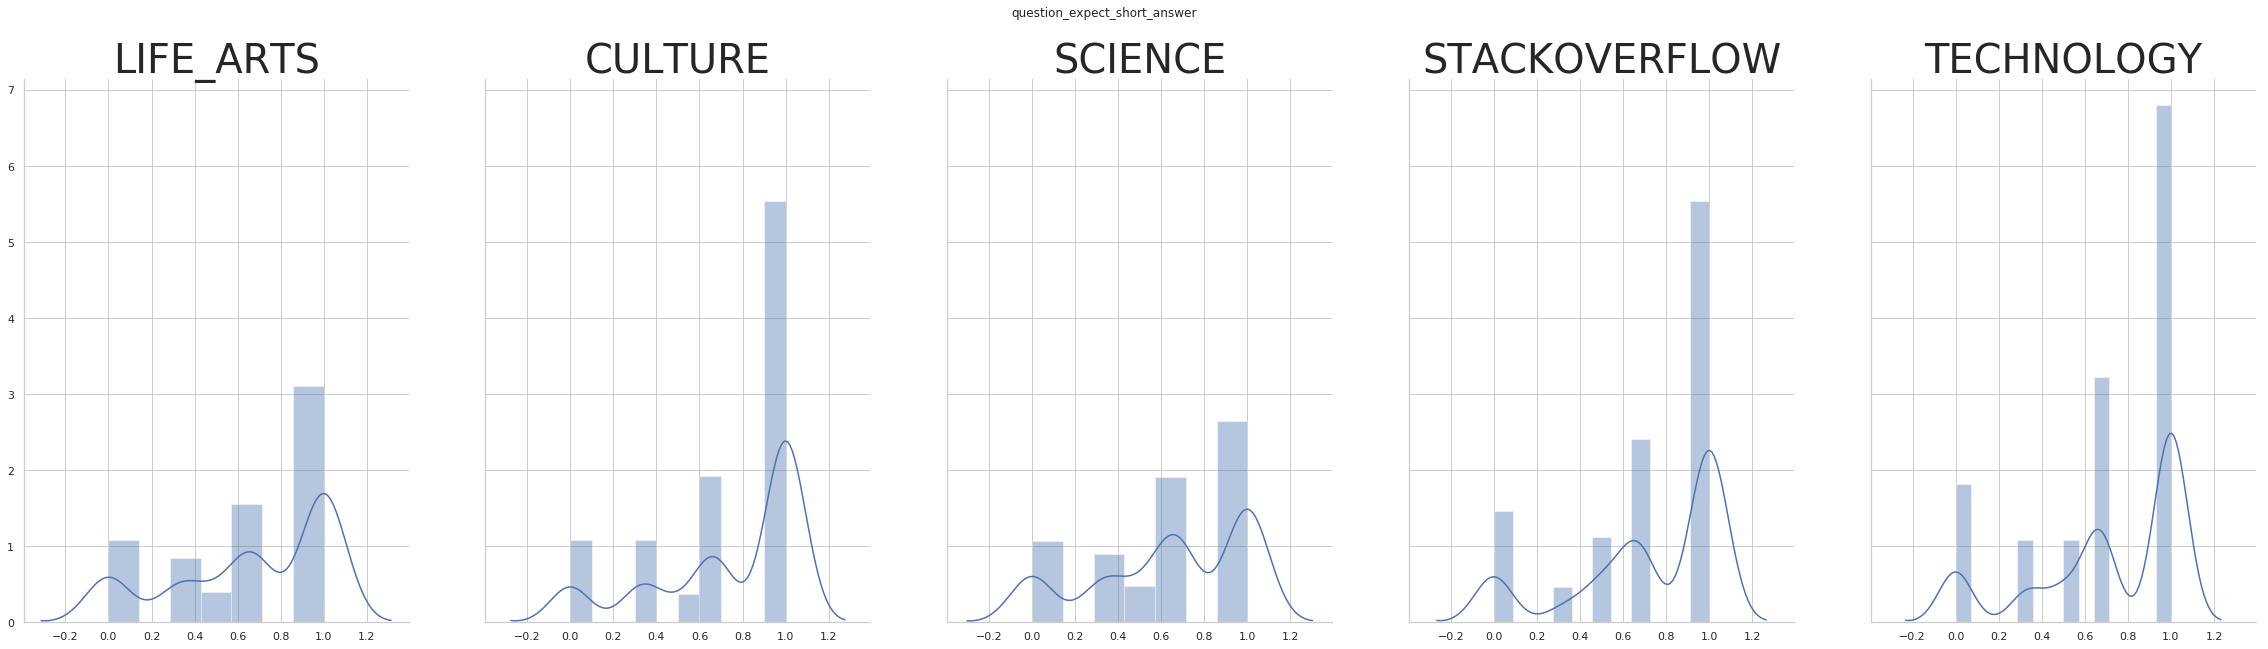

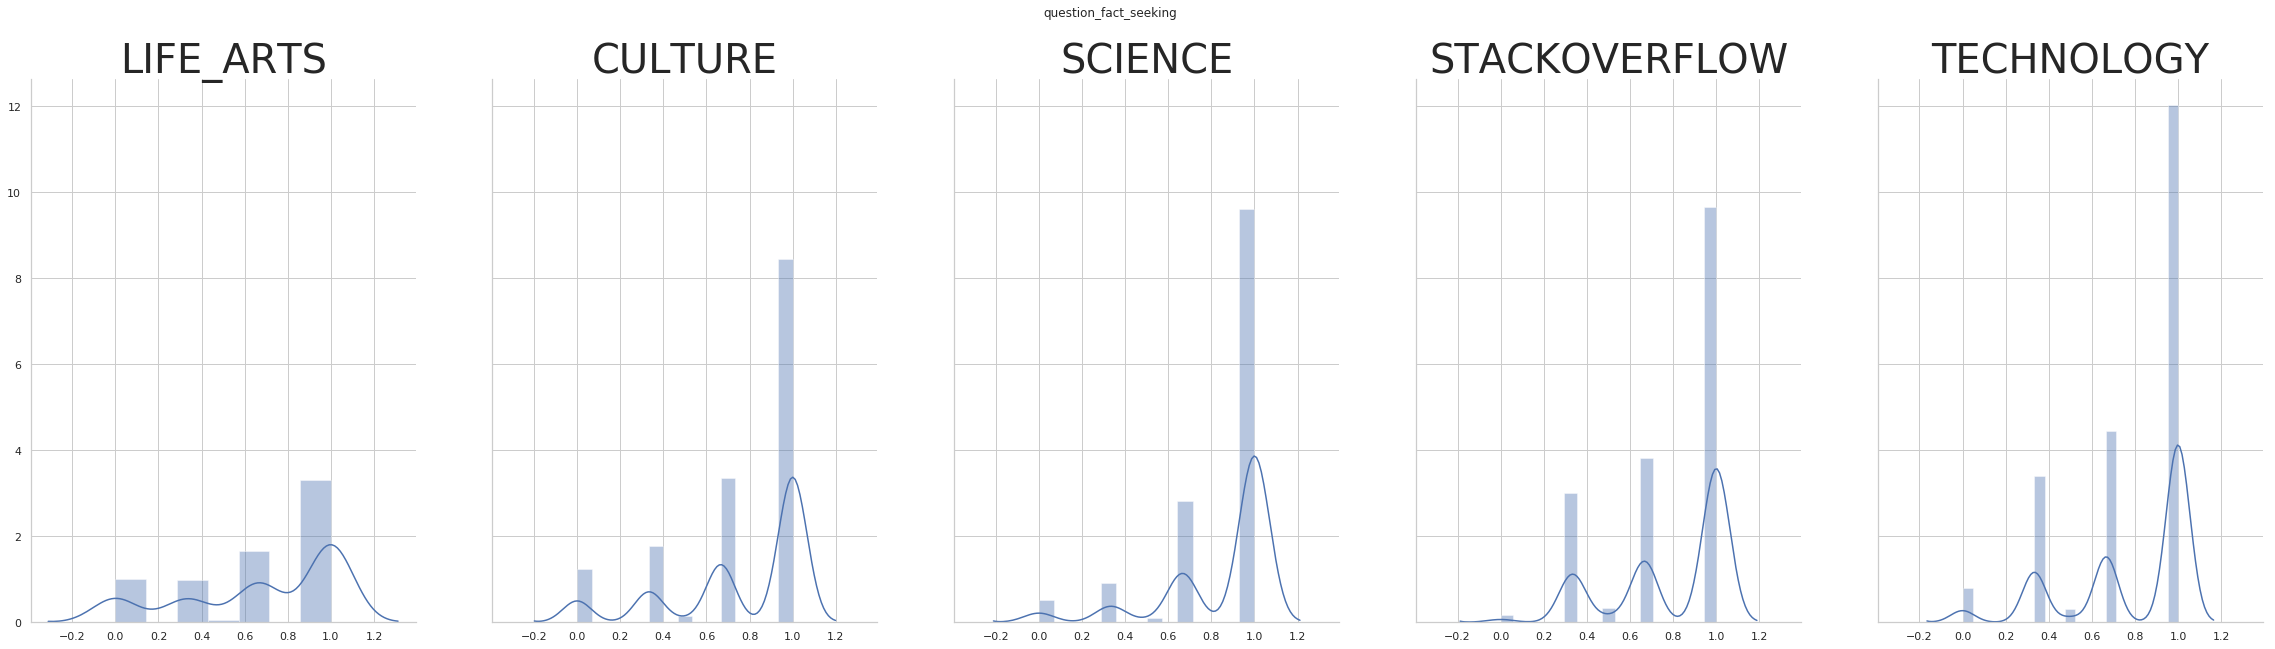

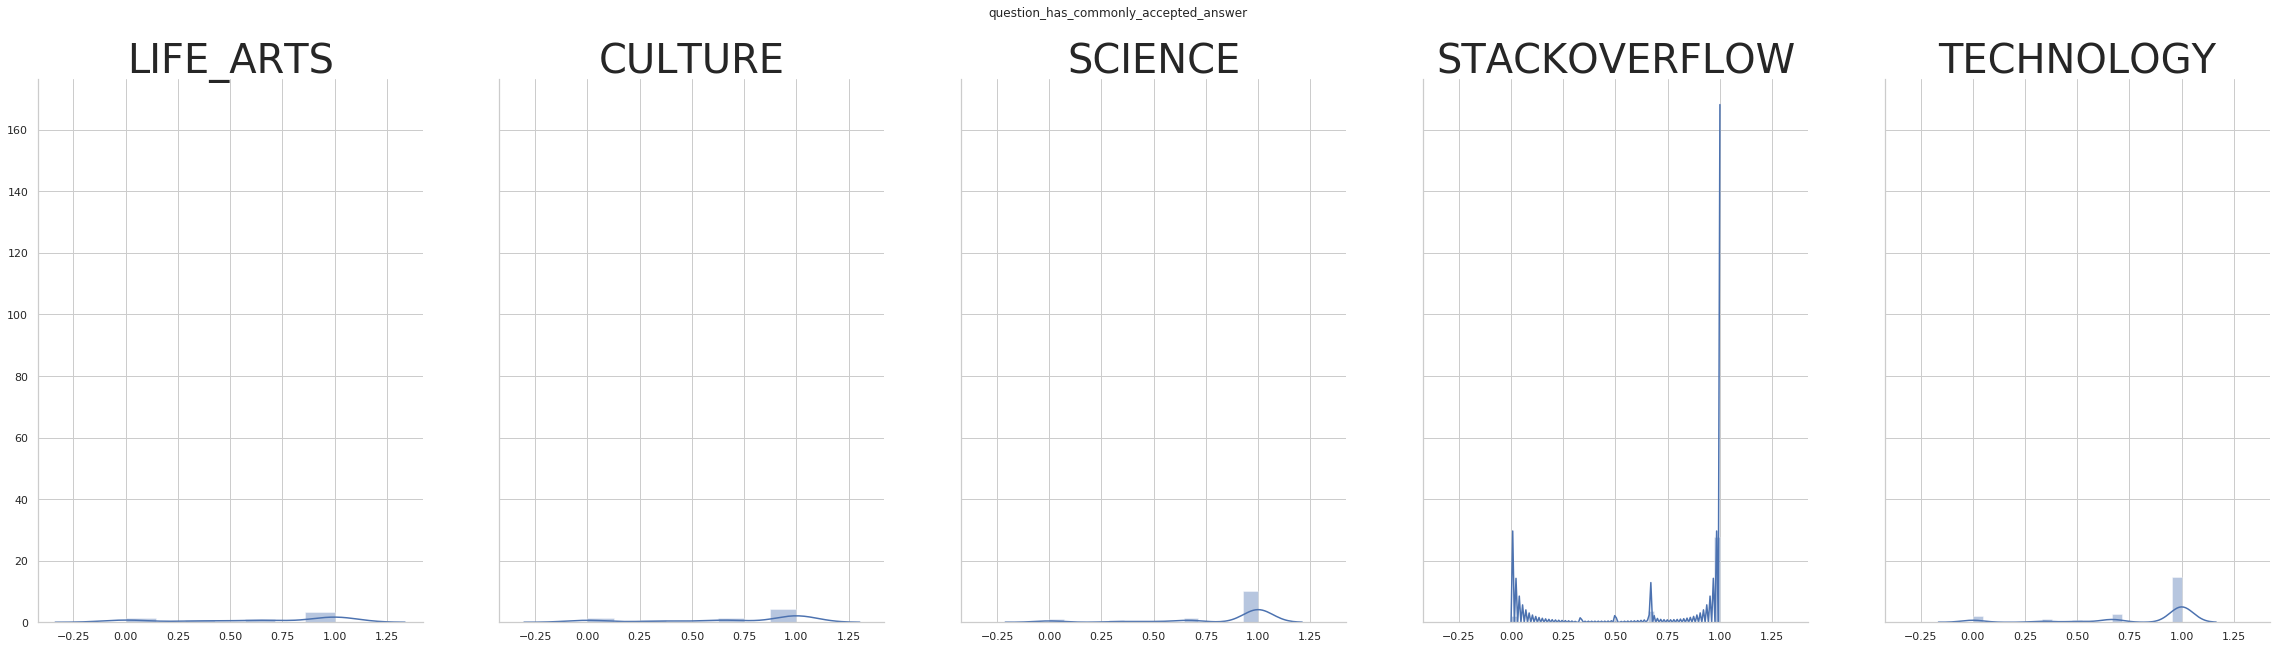

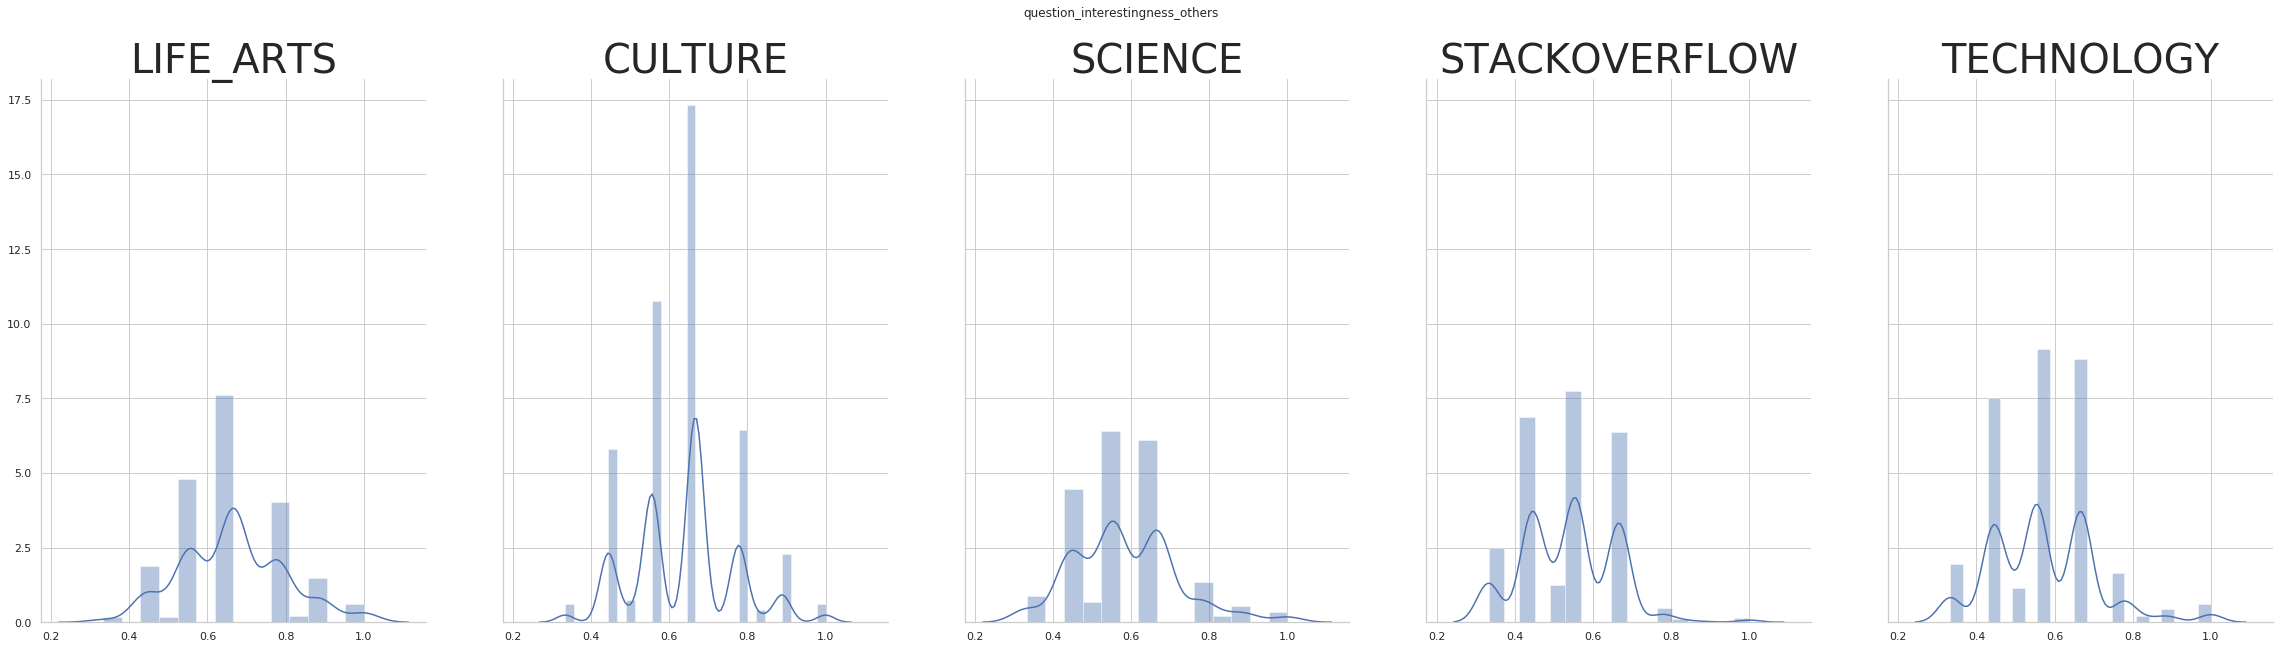

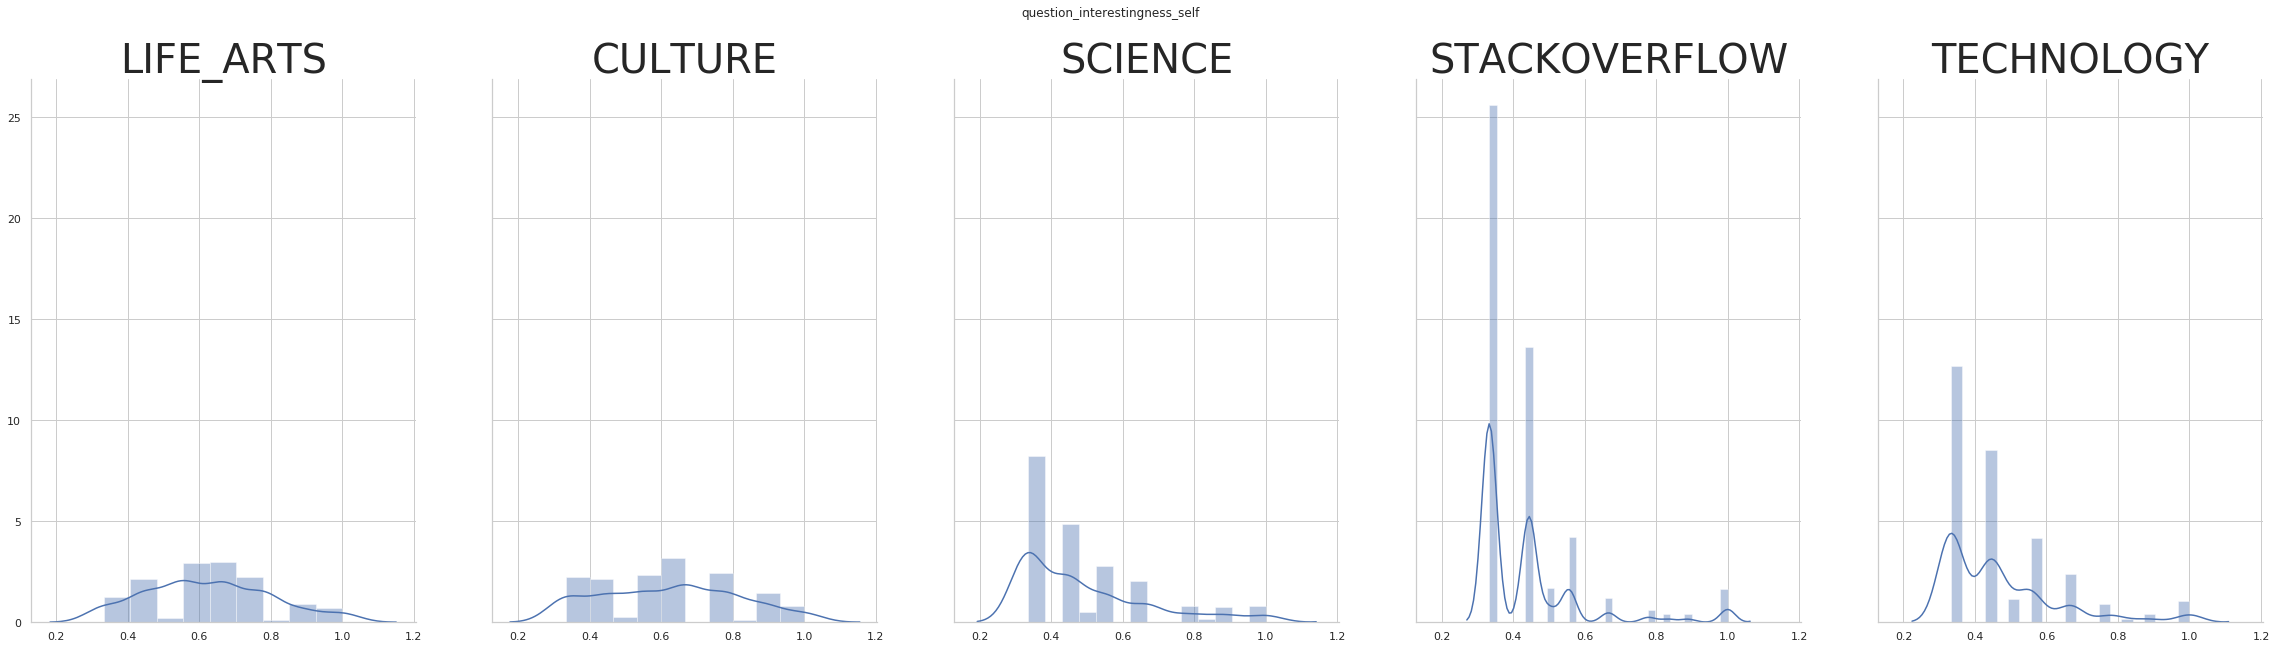

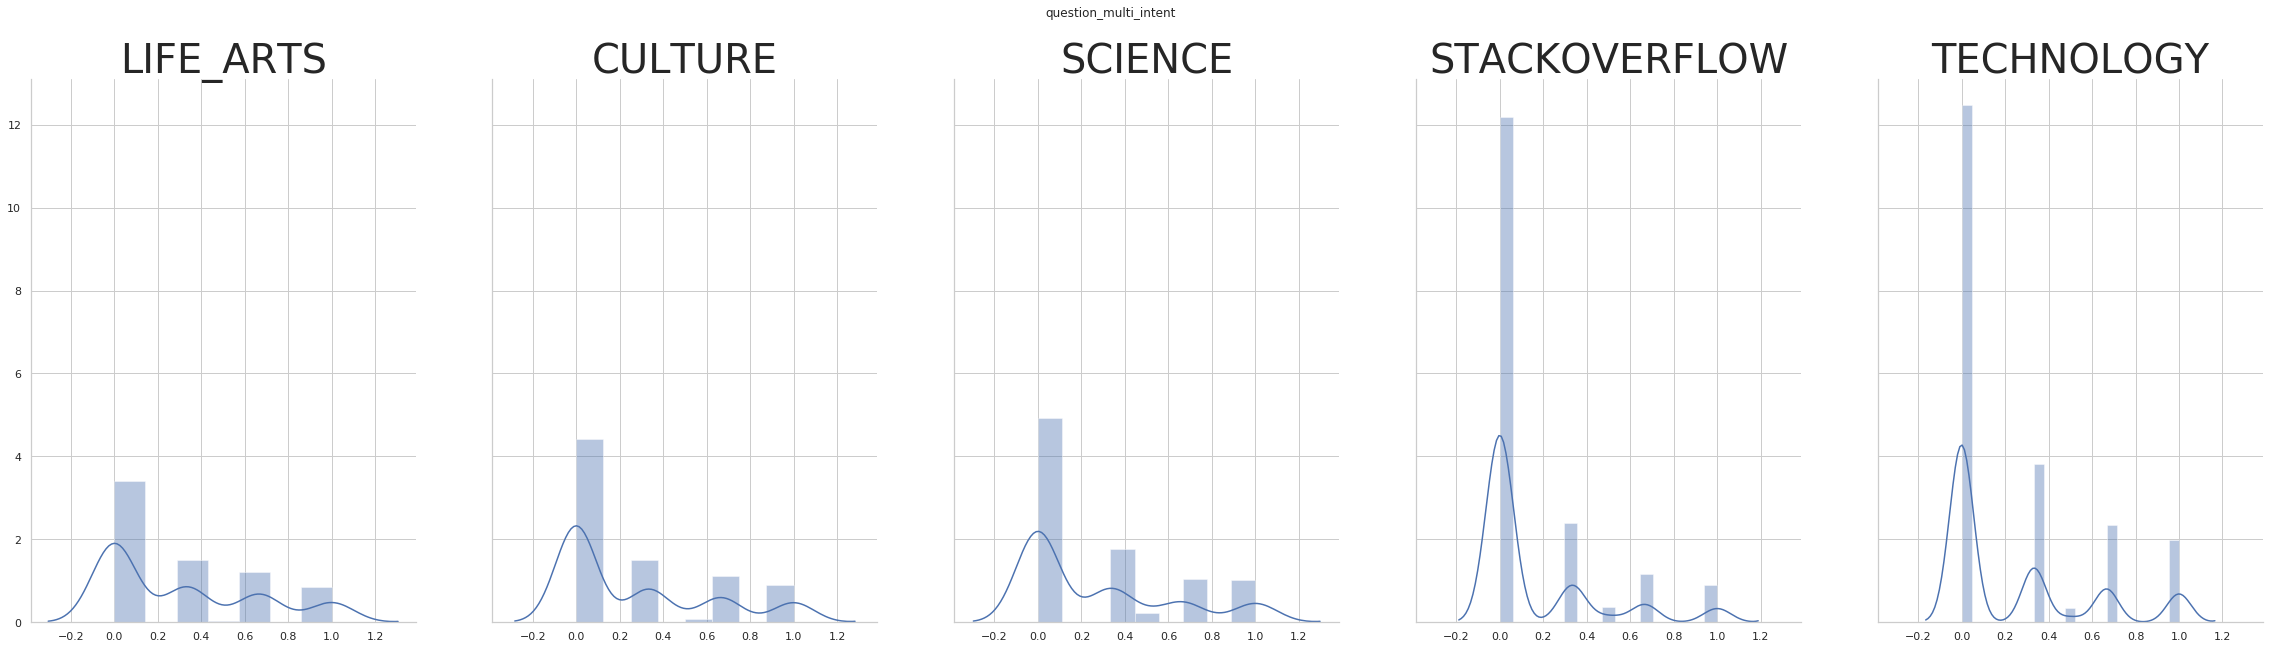

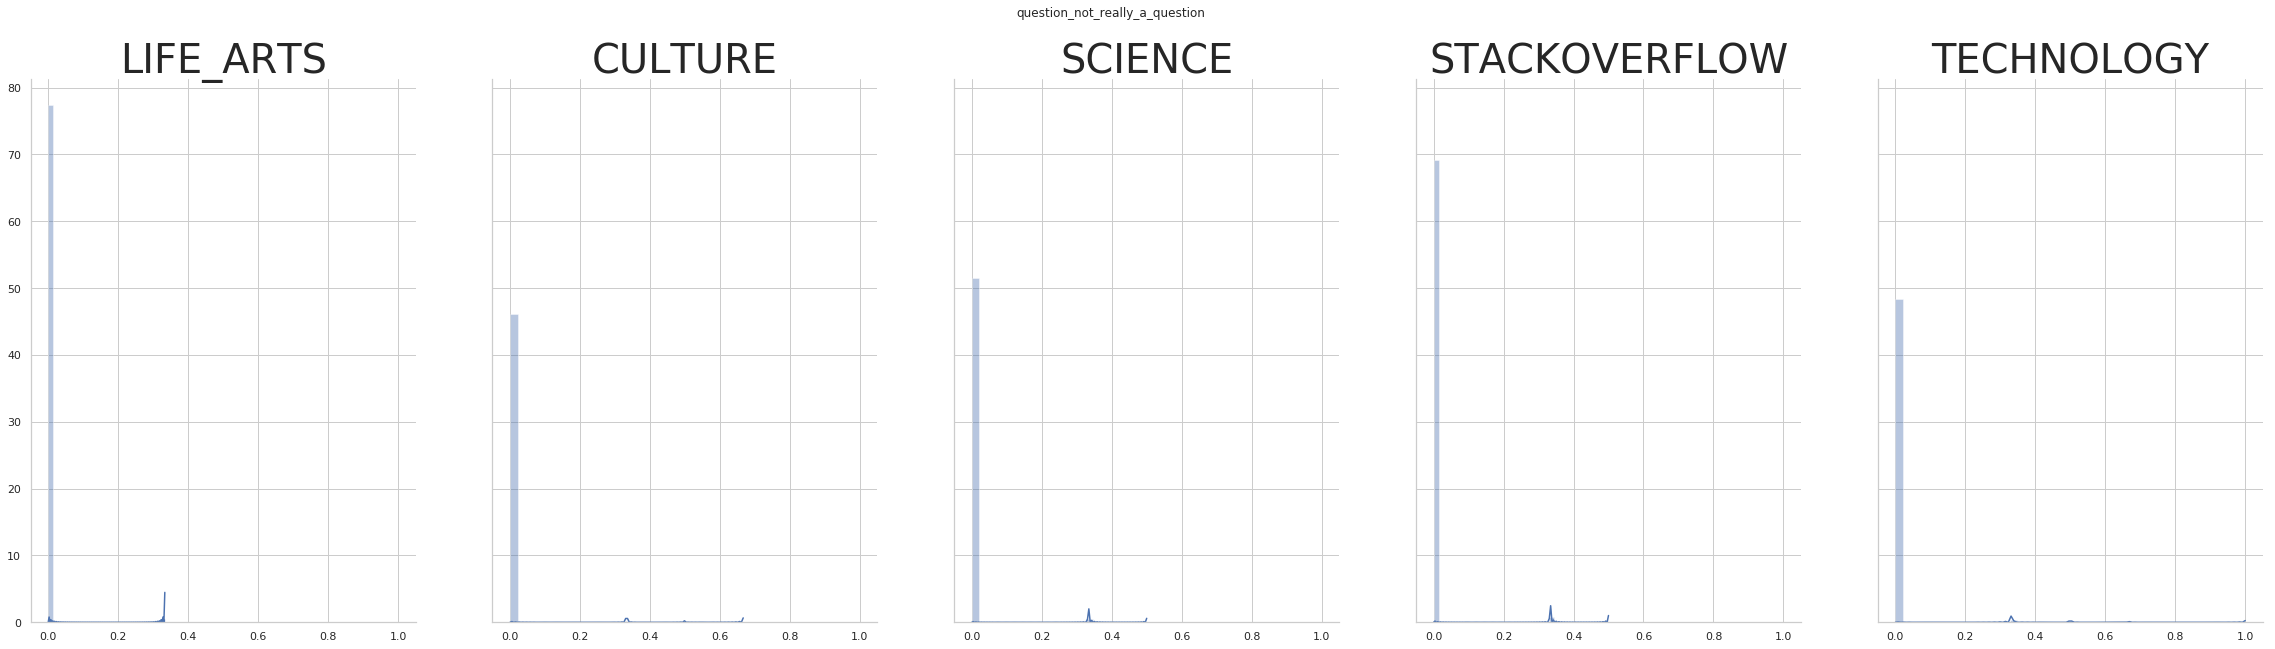

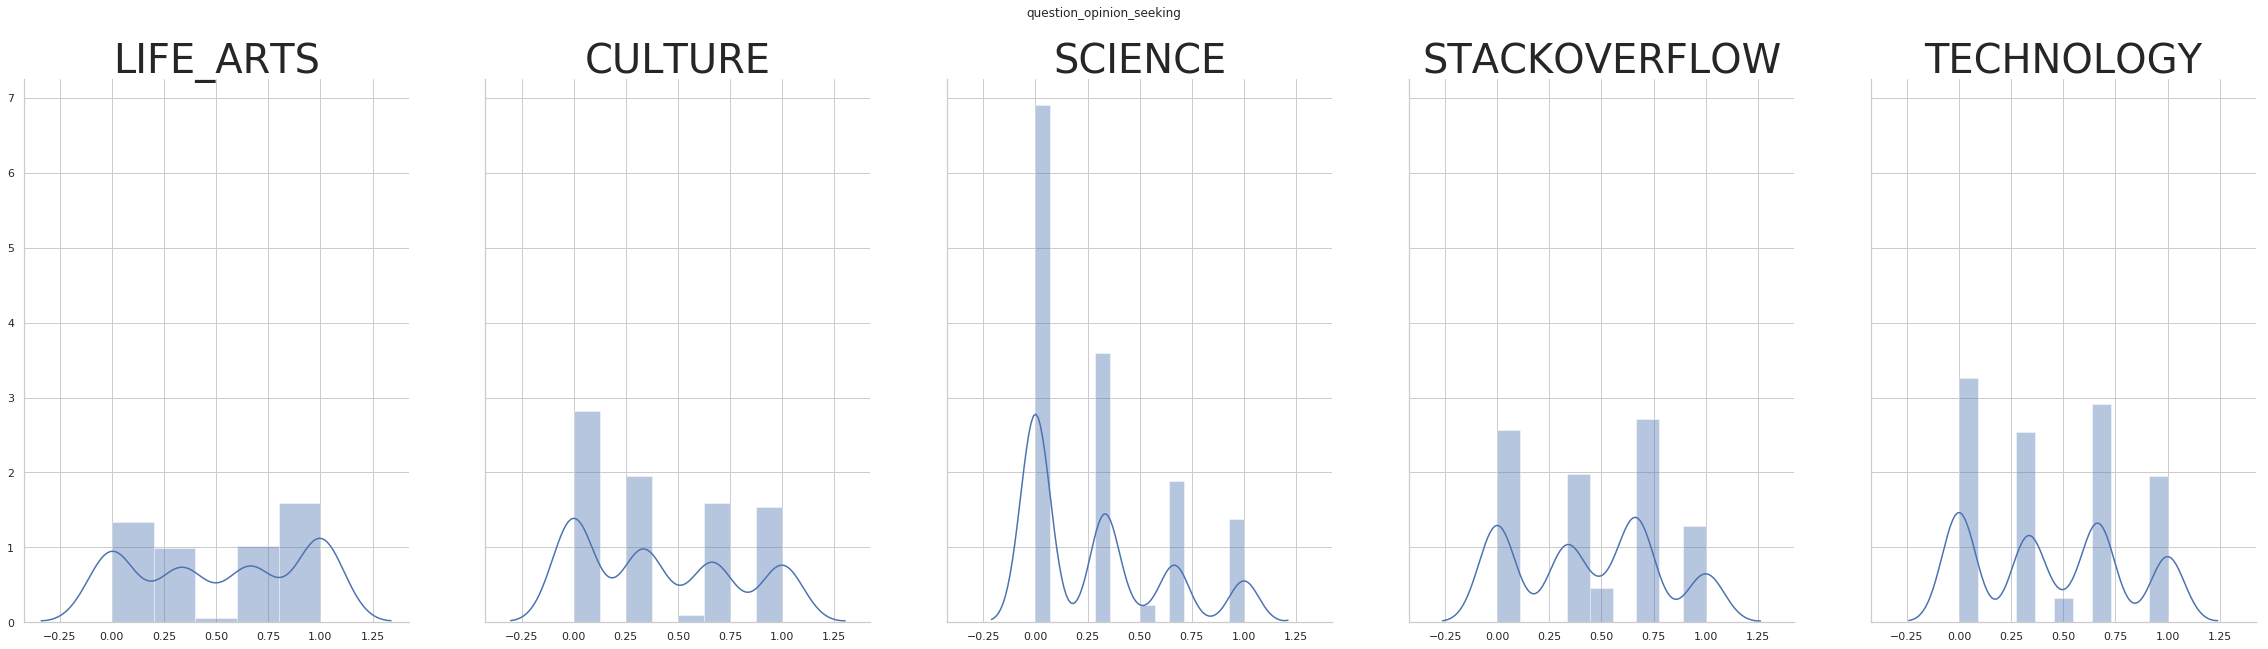

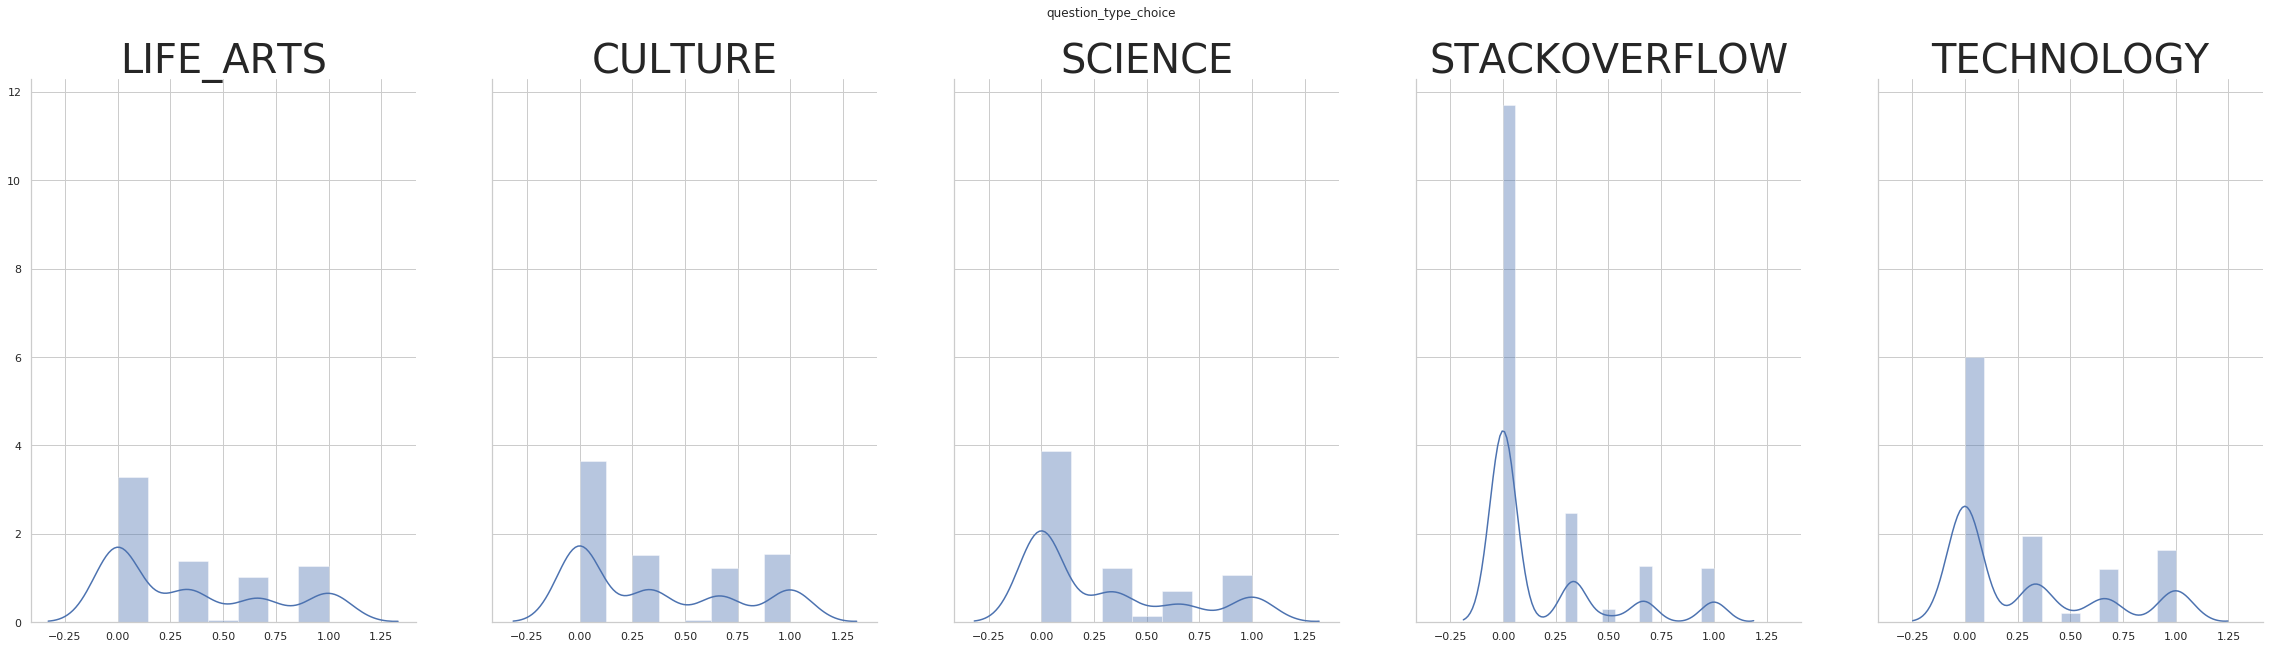

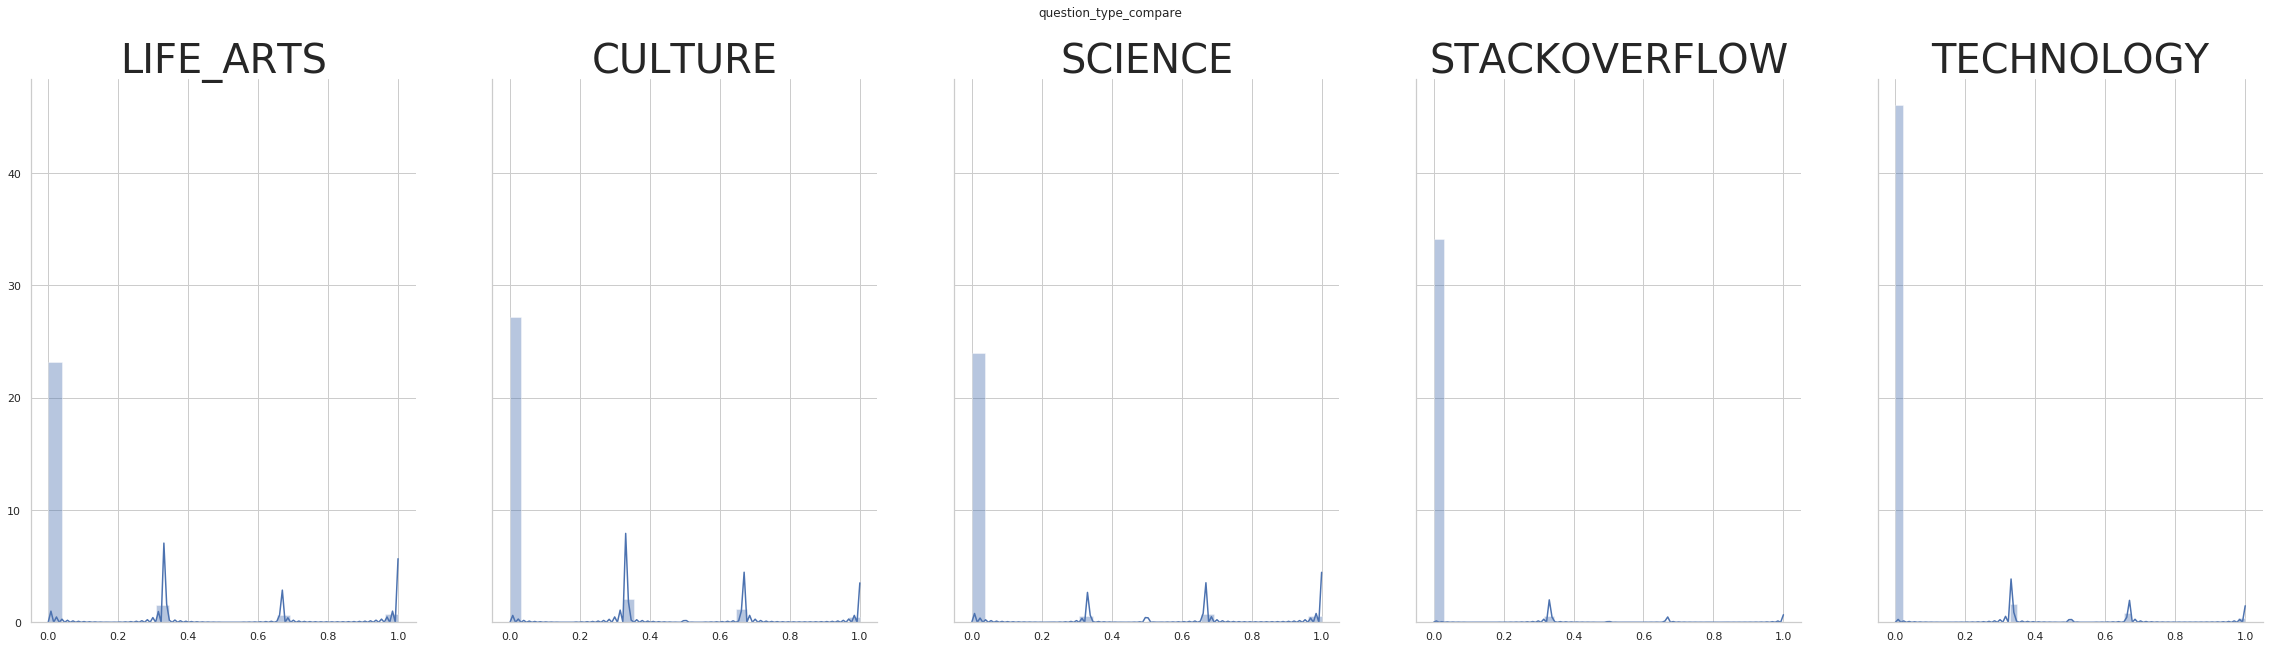

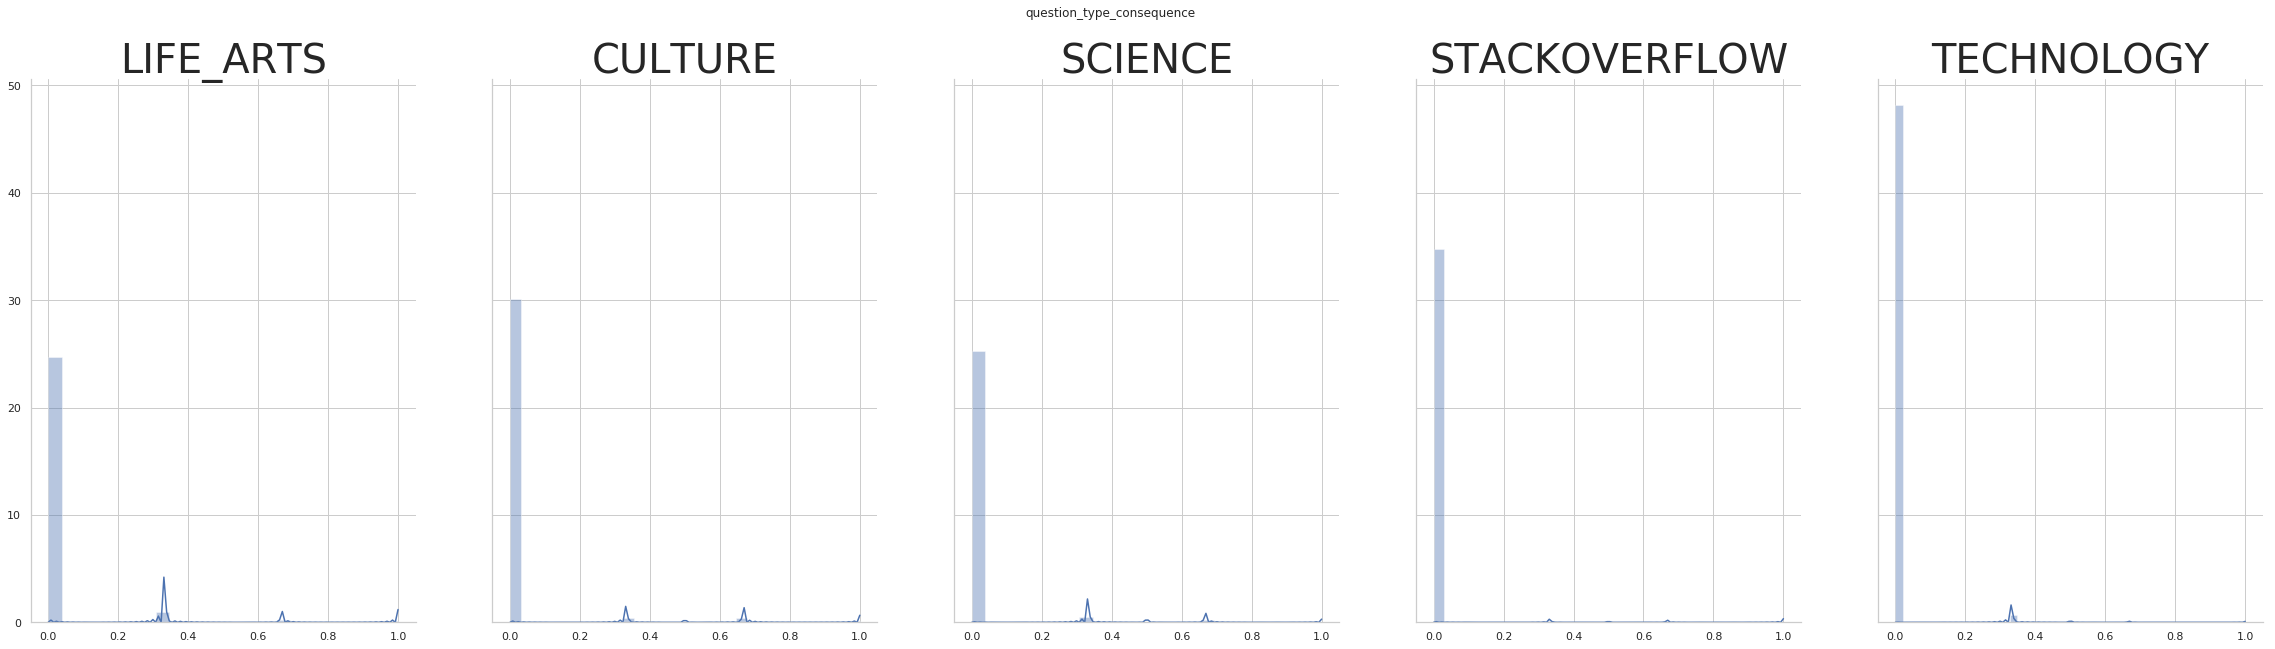

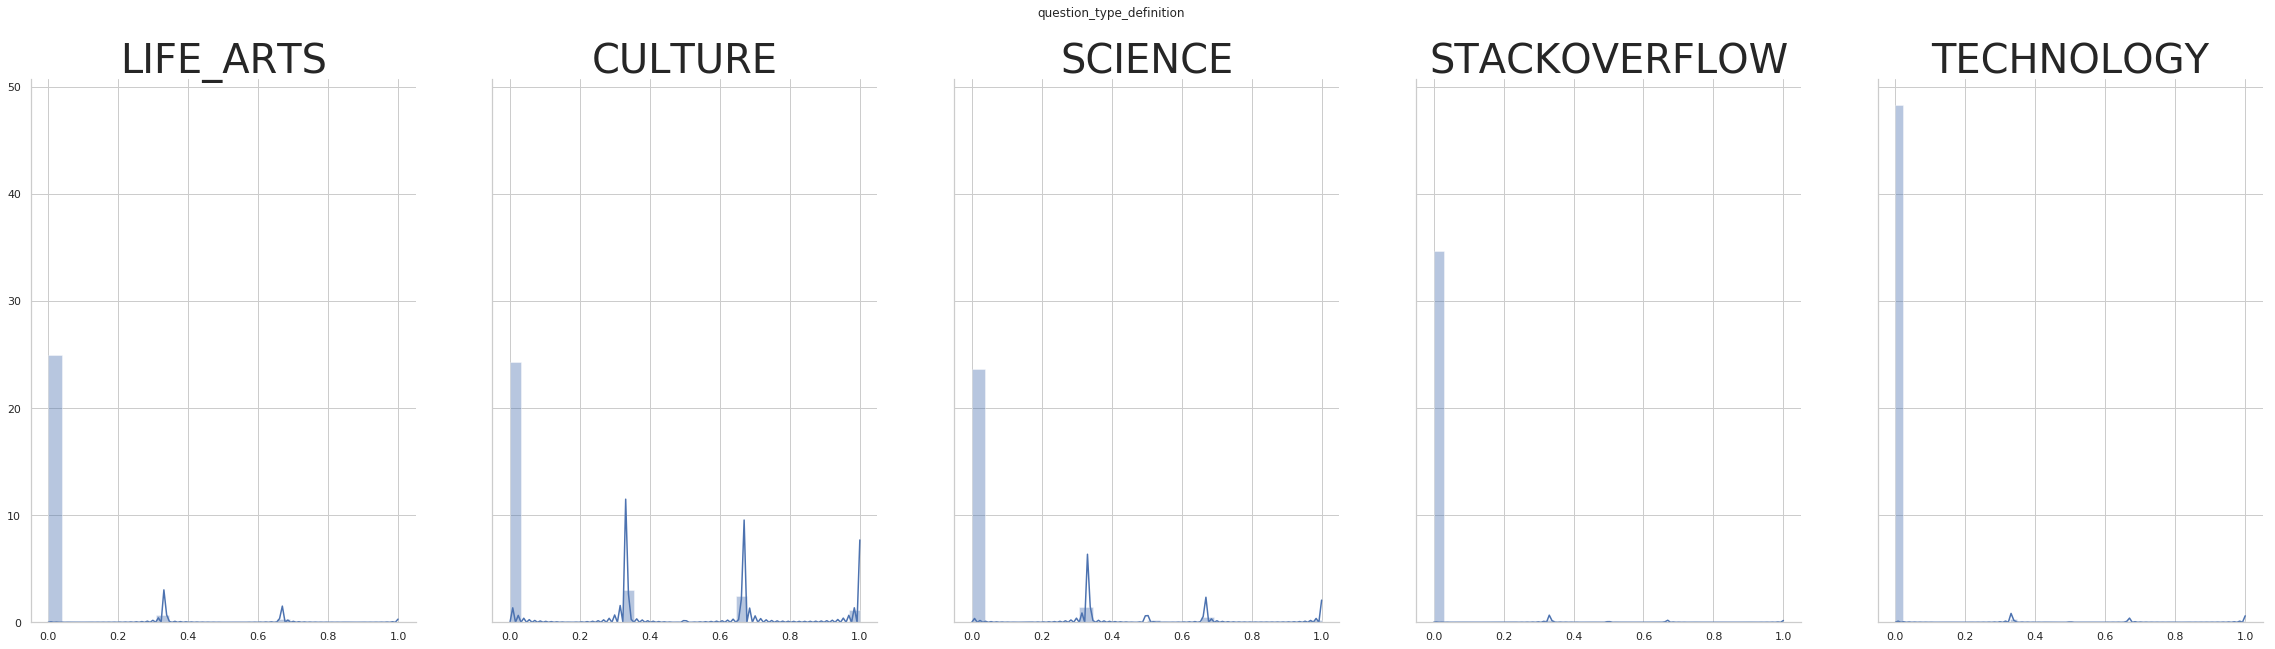

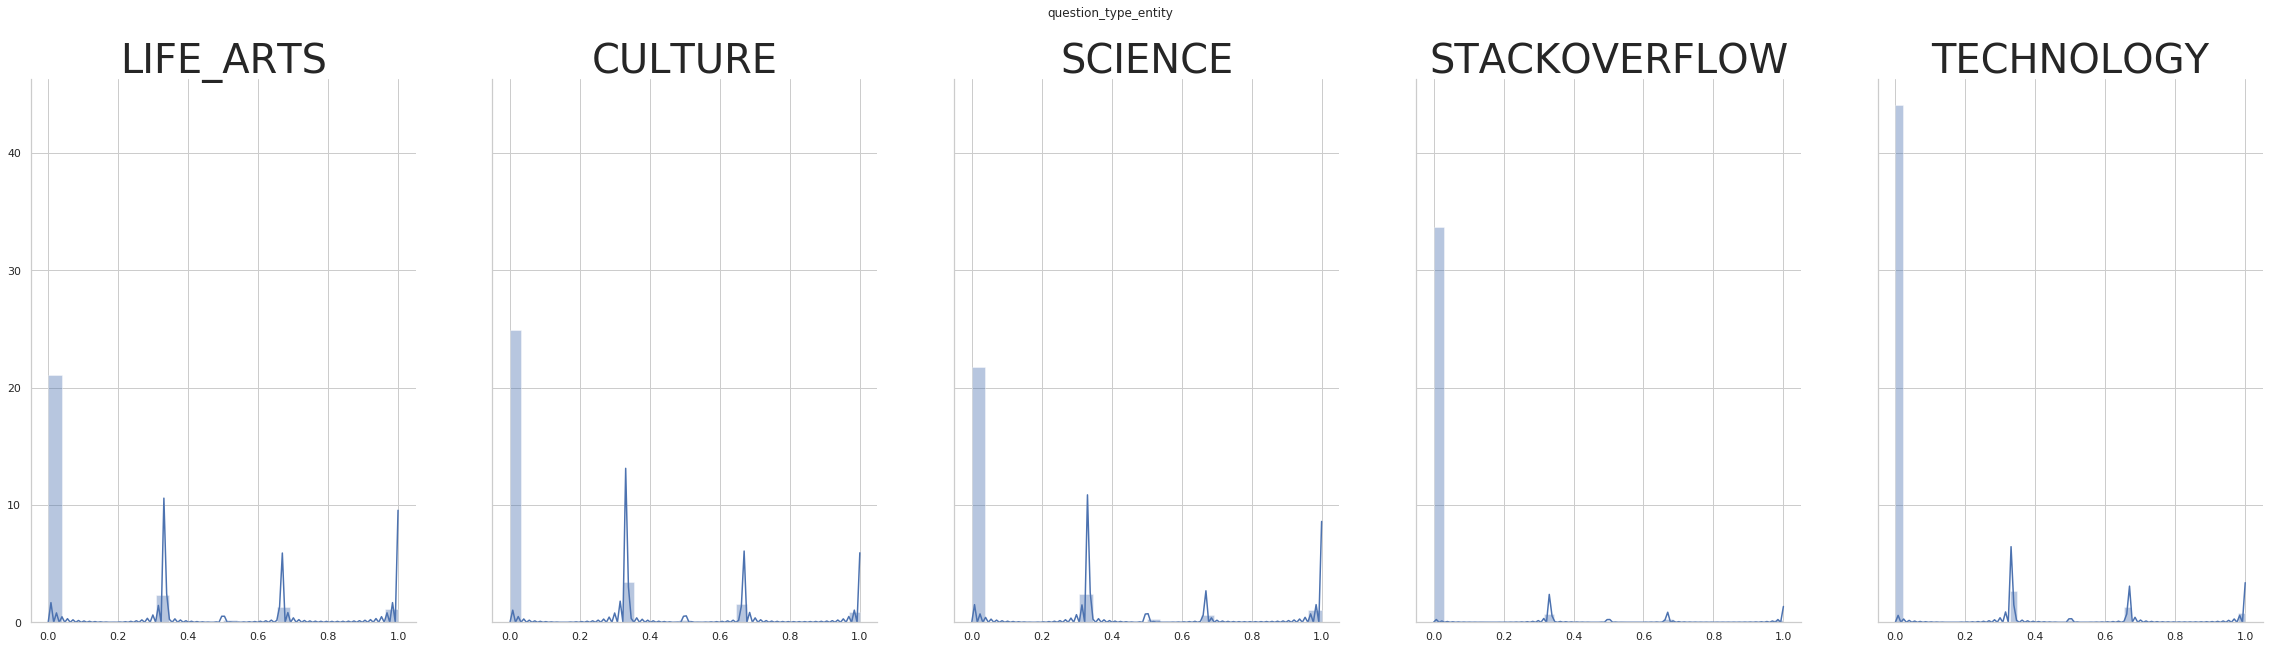

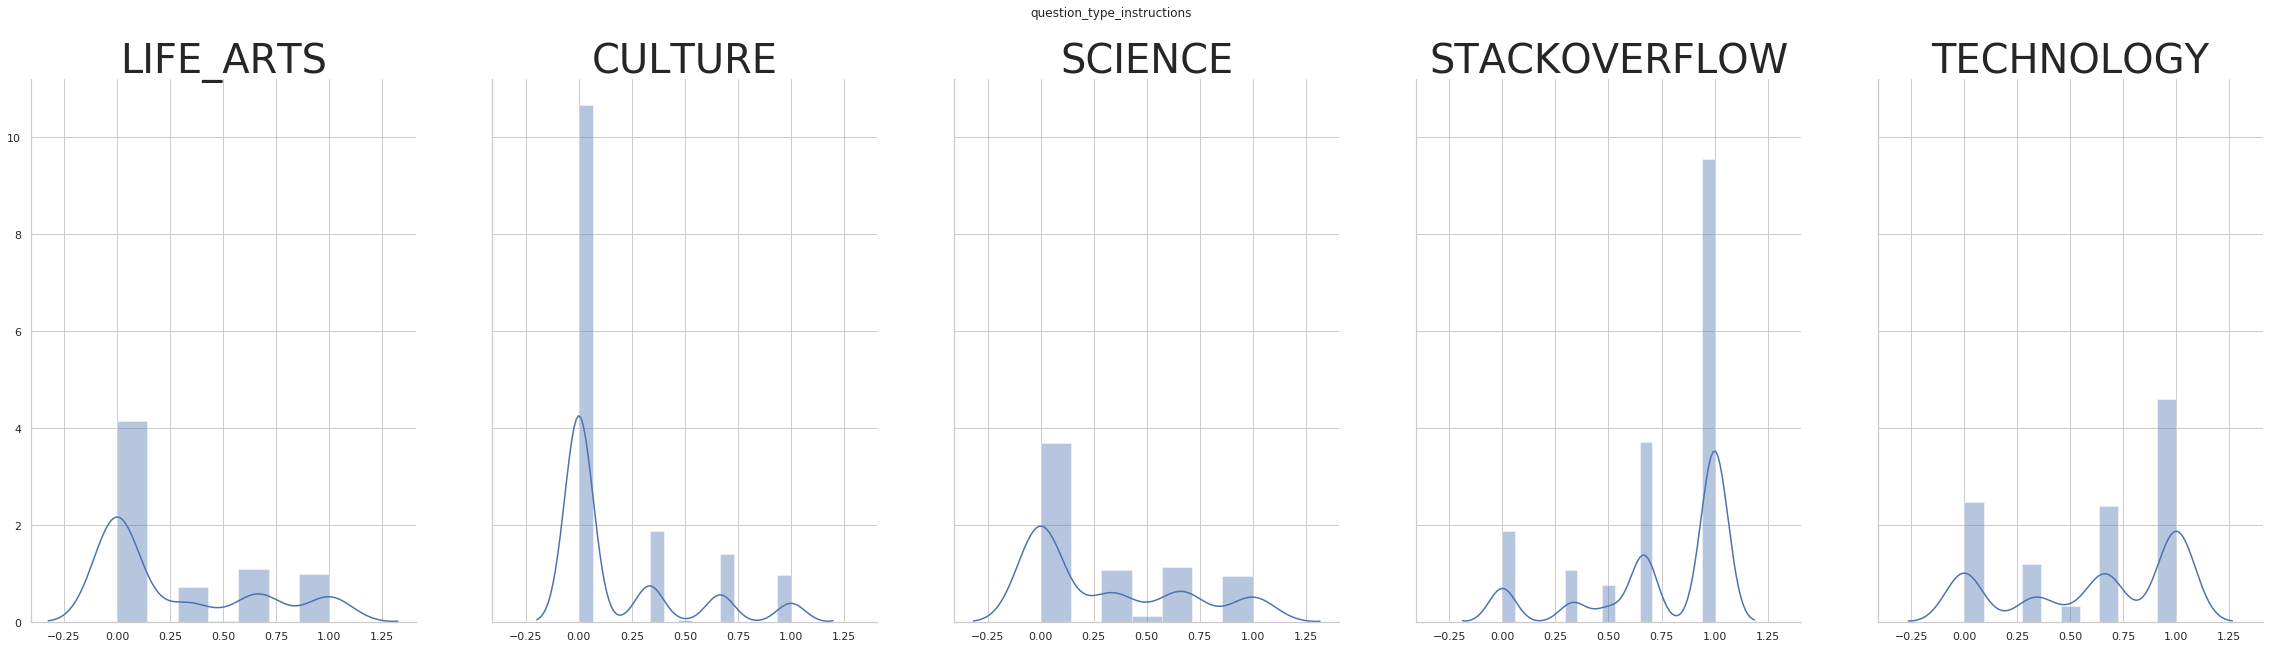

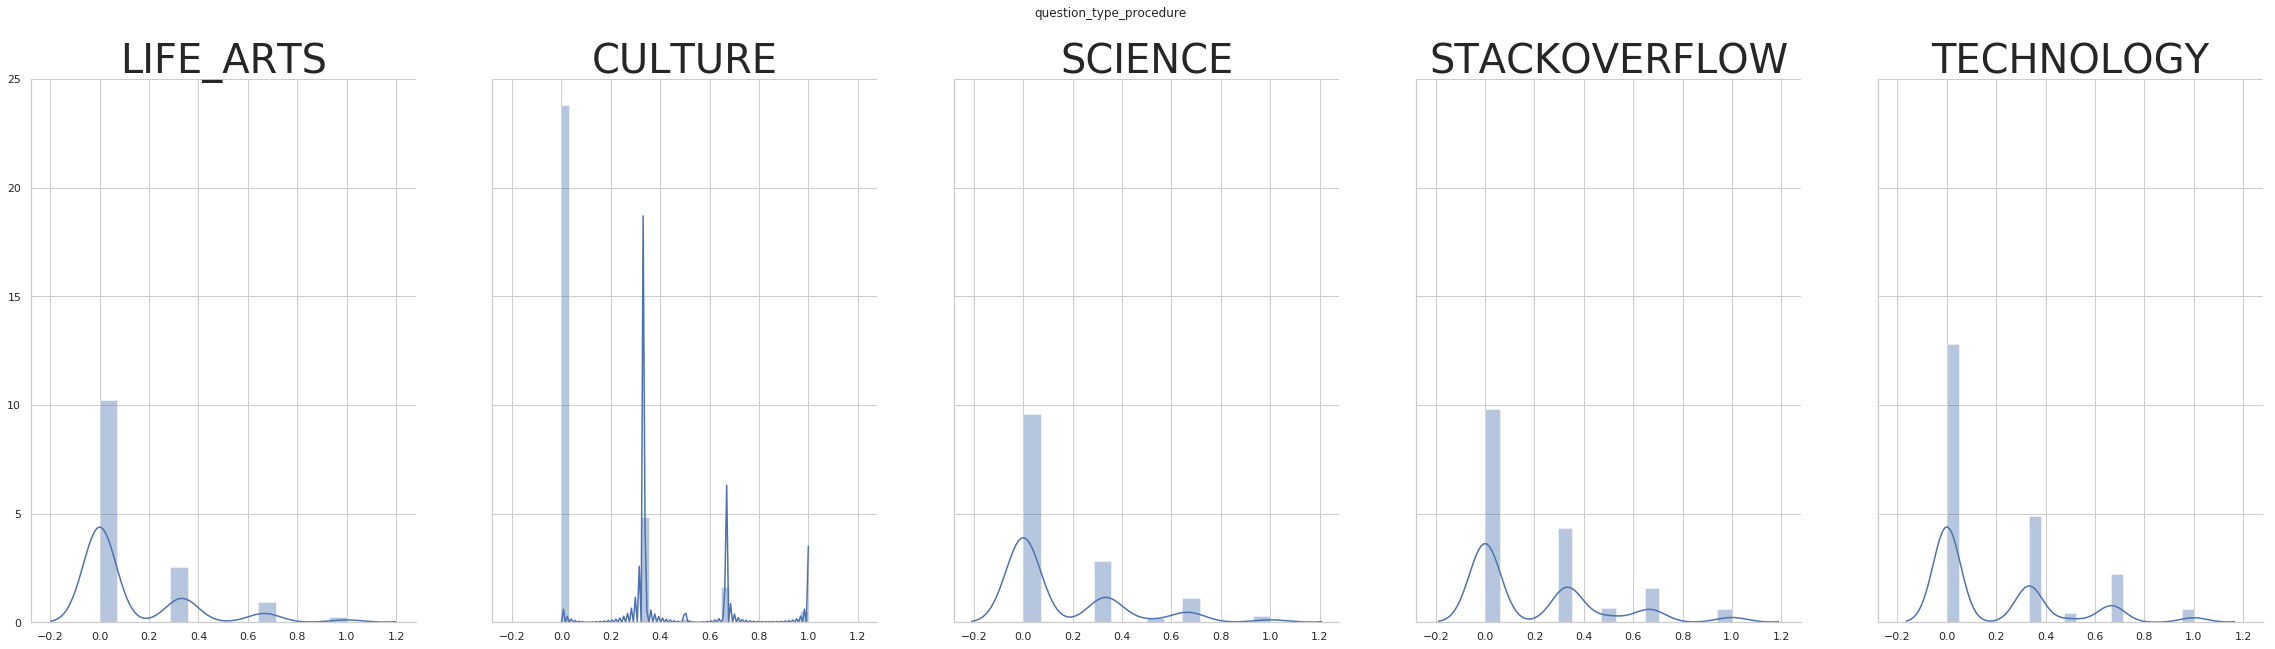

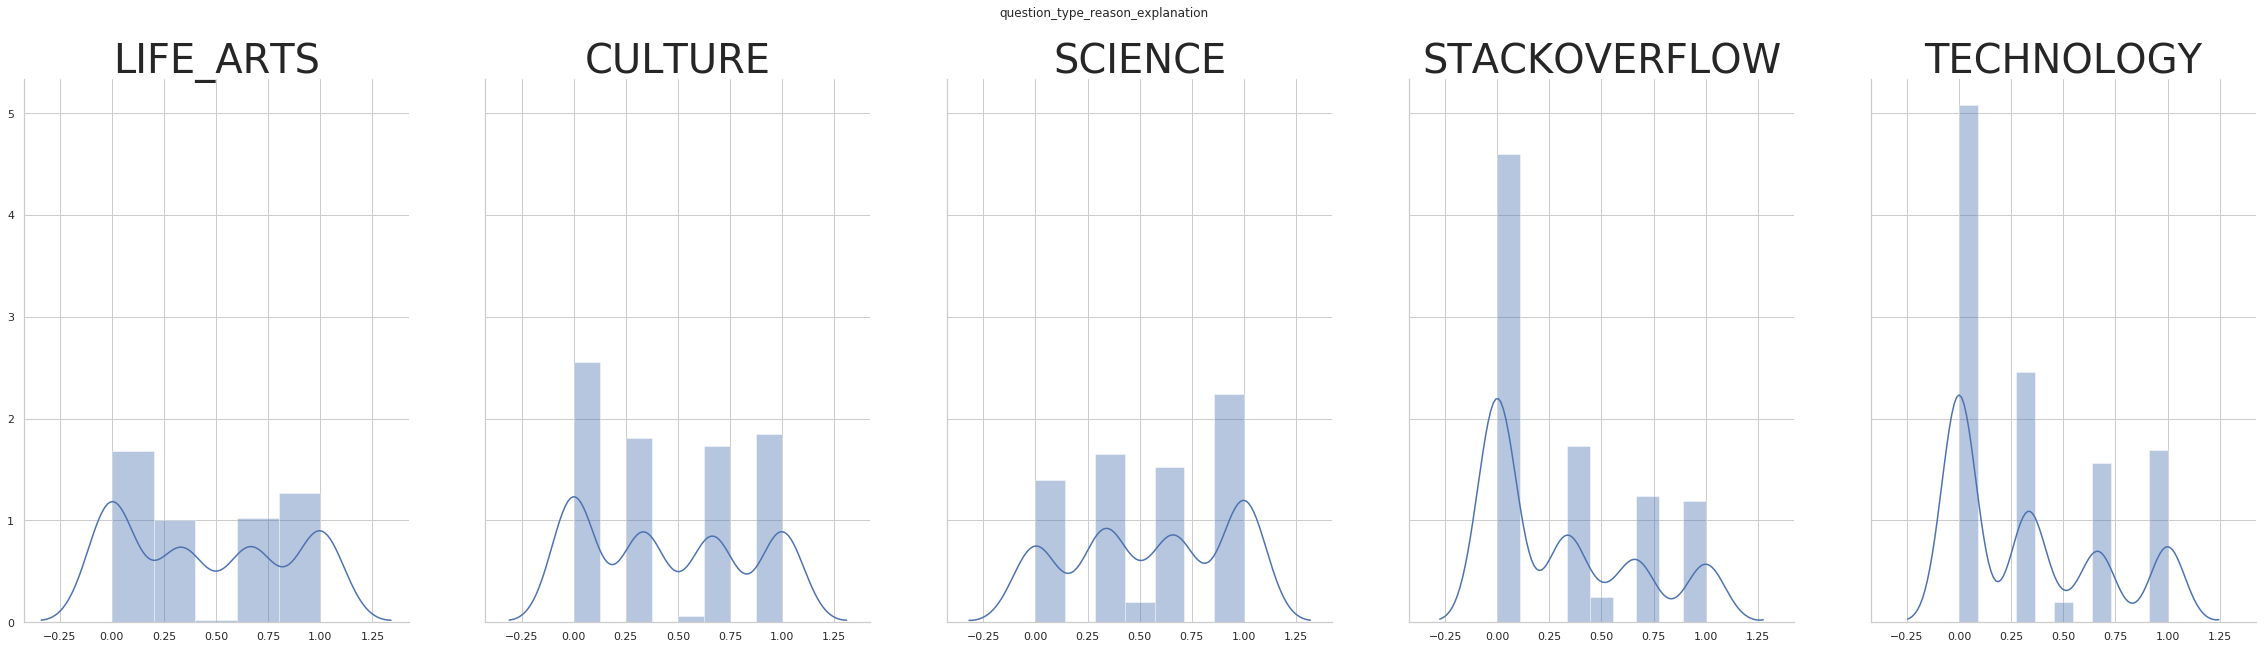

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


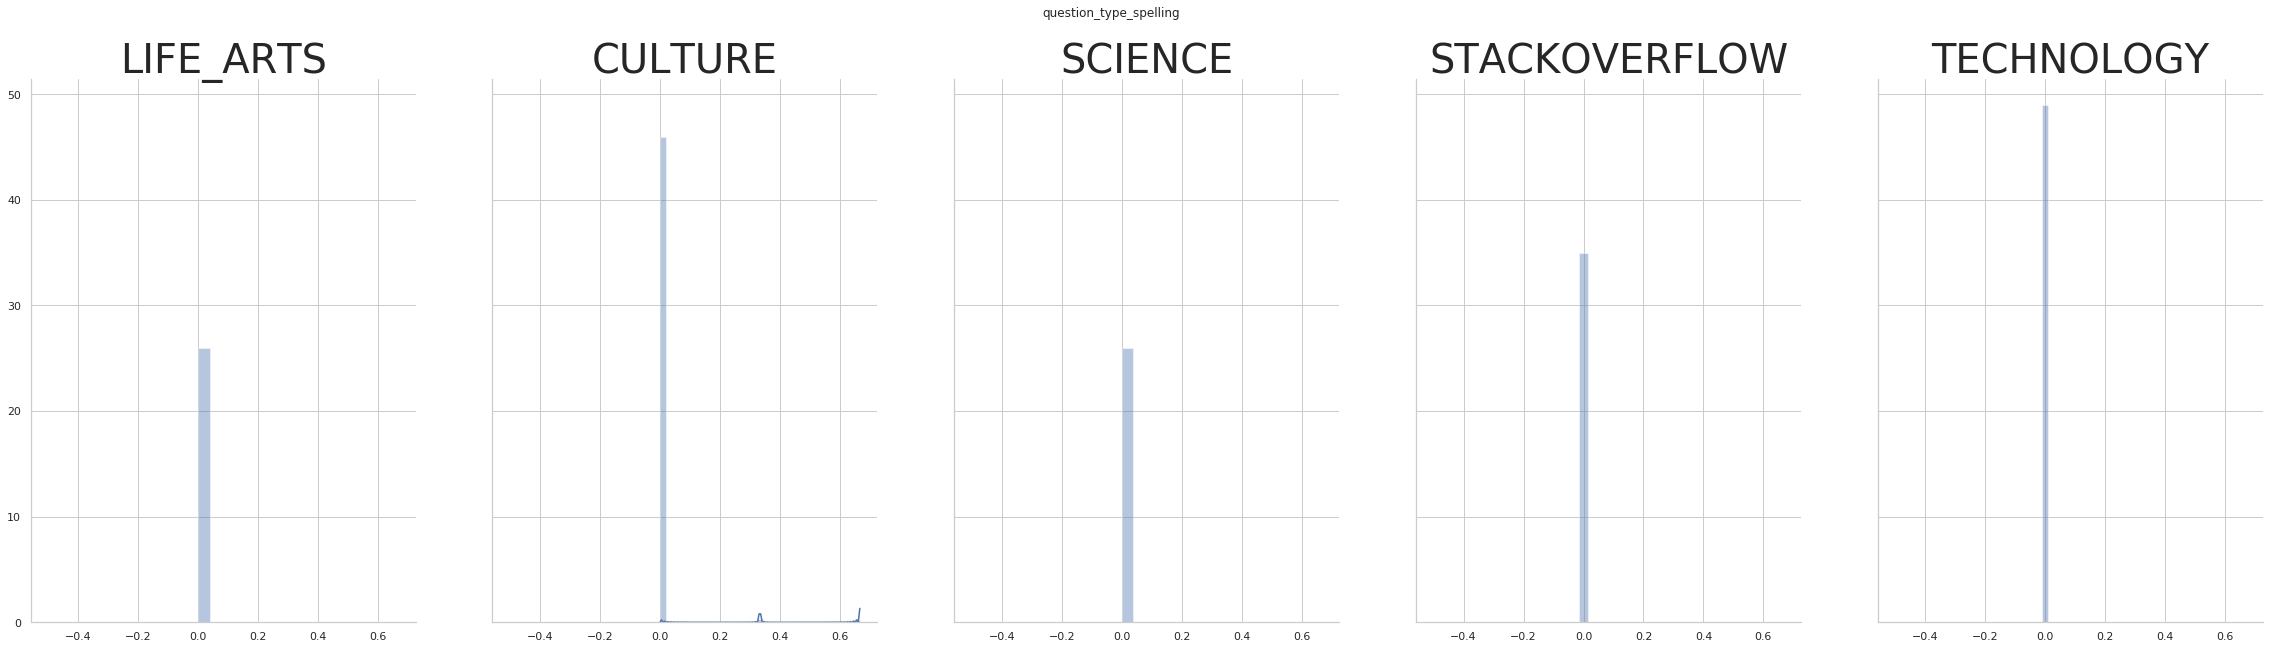

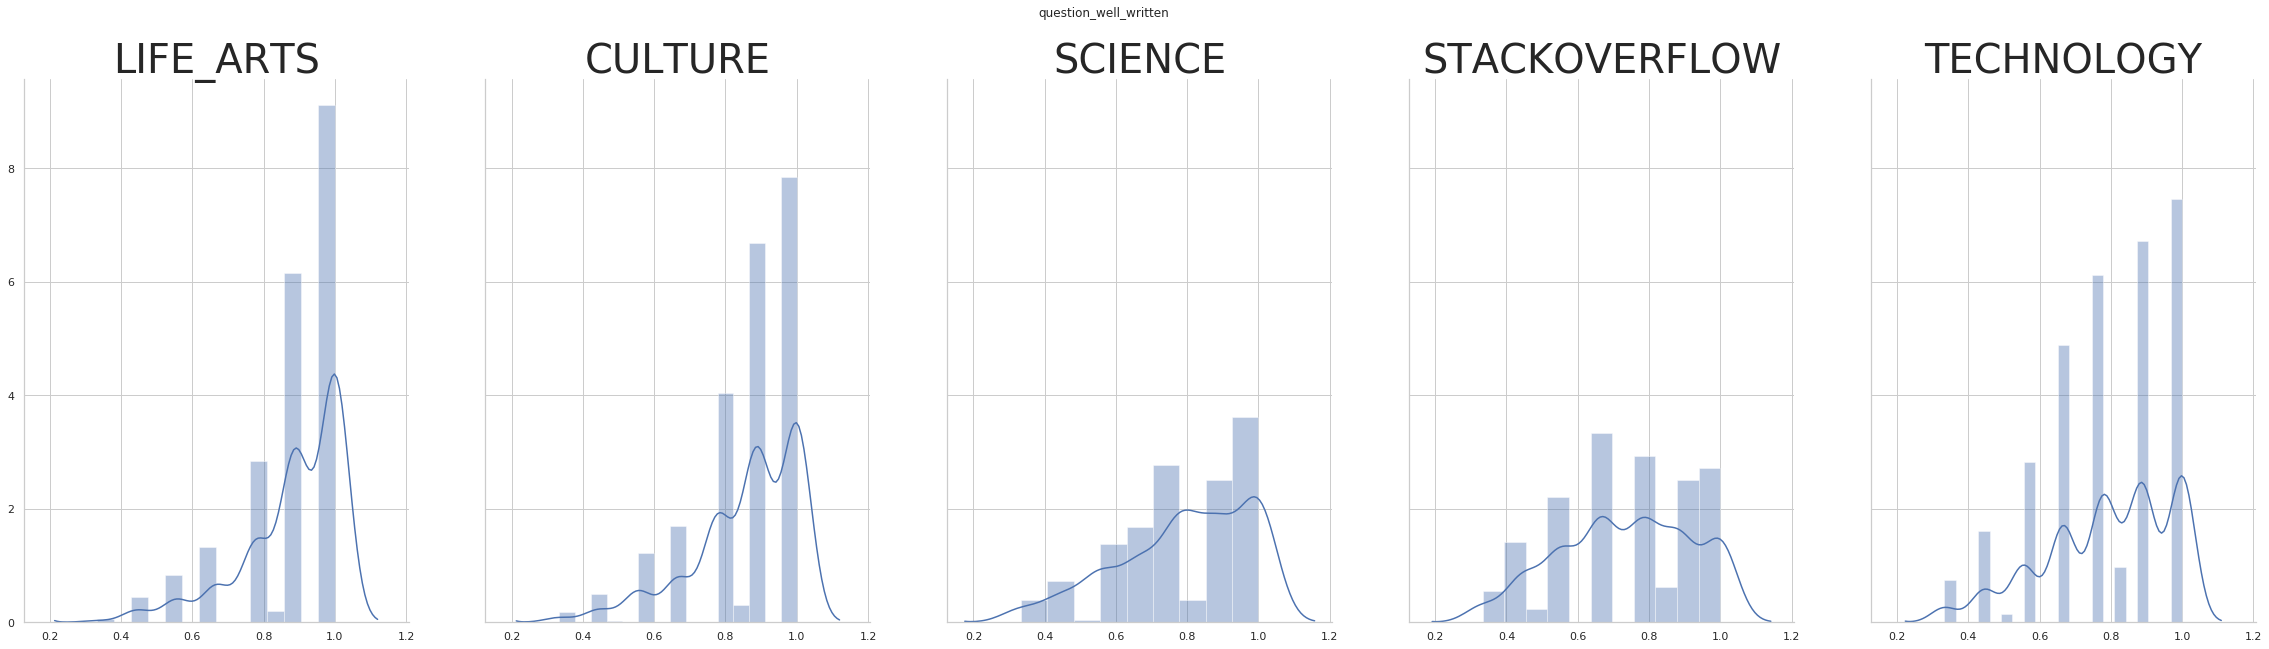

In [3]:
for col in question_target_cols:
    fig, axes = plt.subplots(1, 5, figsize=(40, 10), sharex=True, sharey=True)
    fig.suptitle(col) 
    axes = axes.flatten()
    sns.distplot(train[train['category'] == 'LIFE_ARTS'][col], ax=axes[0], axlabel=False).set_title('LIFE_ARTS')
    sns.distplot(train[train['category'] == 'CULTURE'][col], ax=axes[1], axlabel=False).set_title('CULTURE')
    sns.distplot(train[train['category'] == 'SCIENCE'][col], ax=axes[2], axlabel=False).set_title('SCIENCE')
    sns.distplot(train[train['category'] == 'STACKOVERFLOW'][col], ax=axes[3], axlabel=False).set_title('STACKOVERFLOW')
    sns.distplot(train[train['category'] == 'TECHNOLOGY'][col], ax=axes[4], axlabel=False).set_title('TECHNOLOGY')
    sns.despine()
    plt.show()

# Answer category analysis

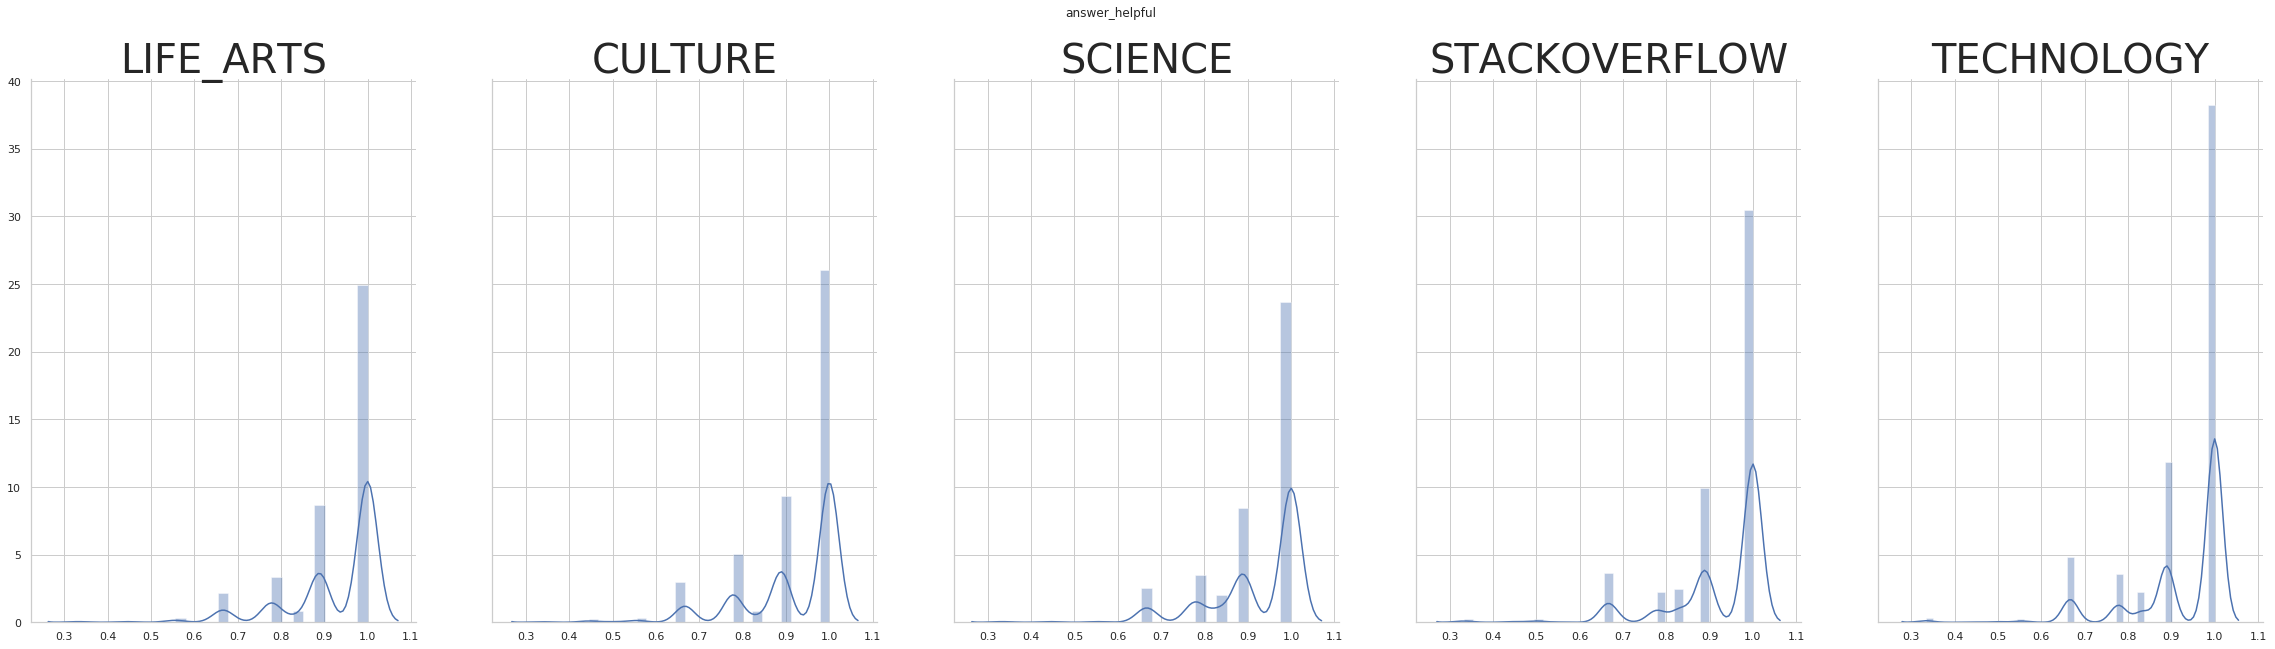

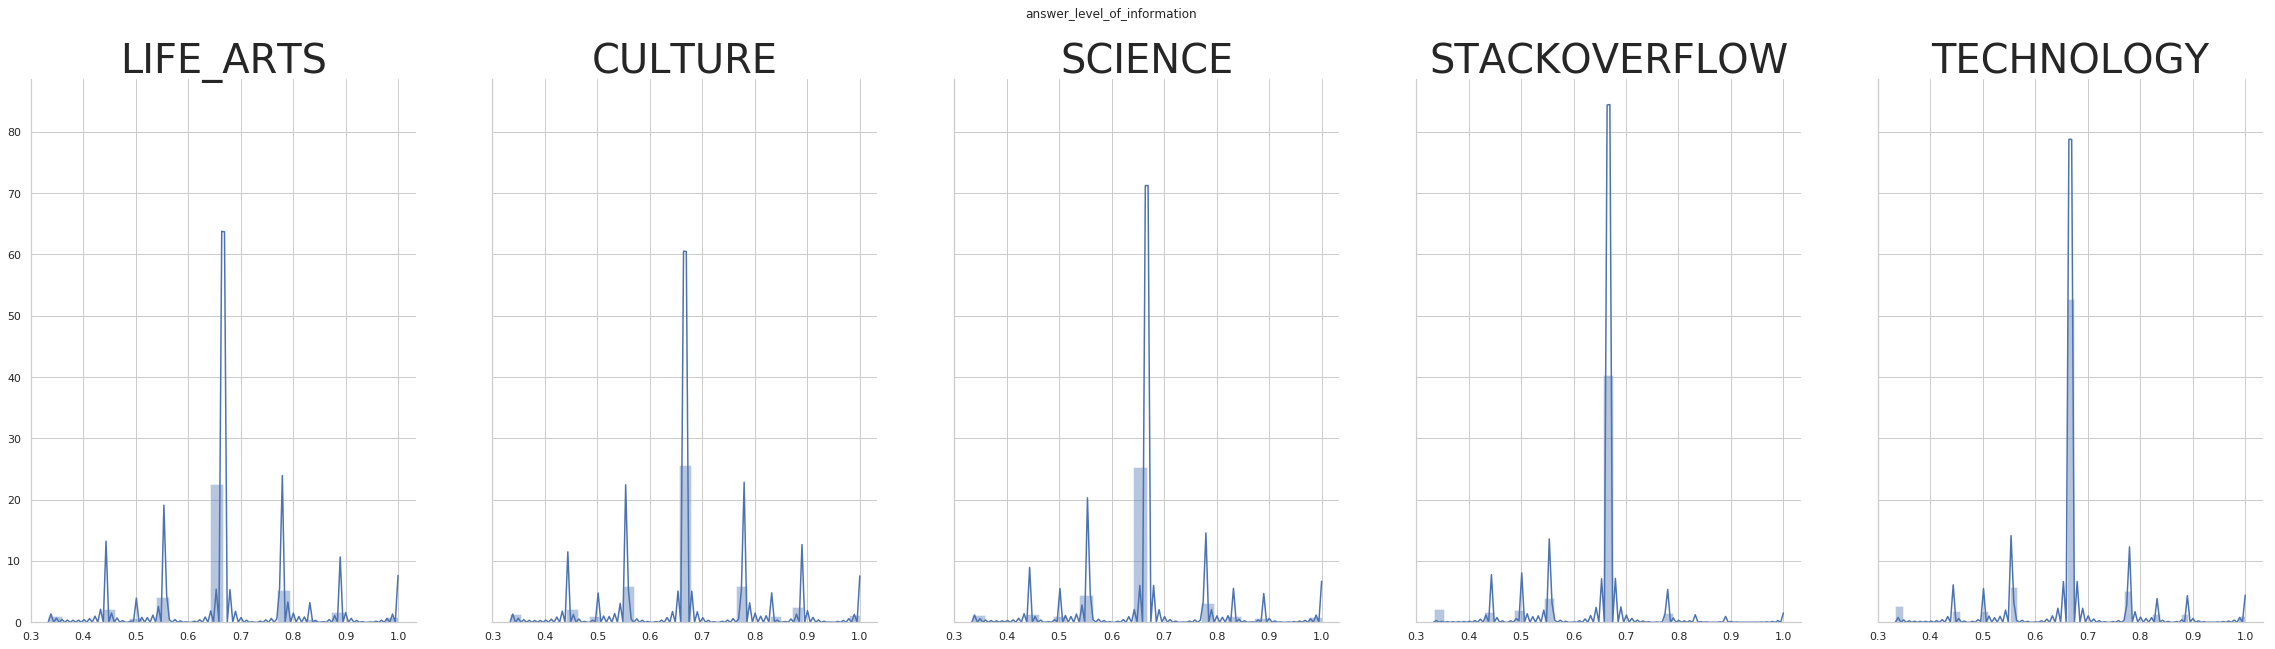

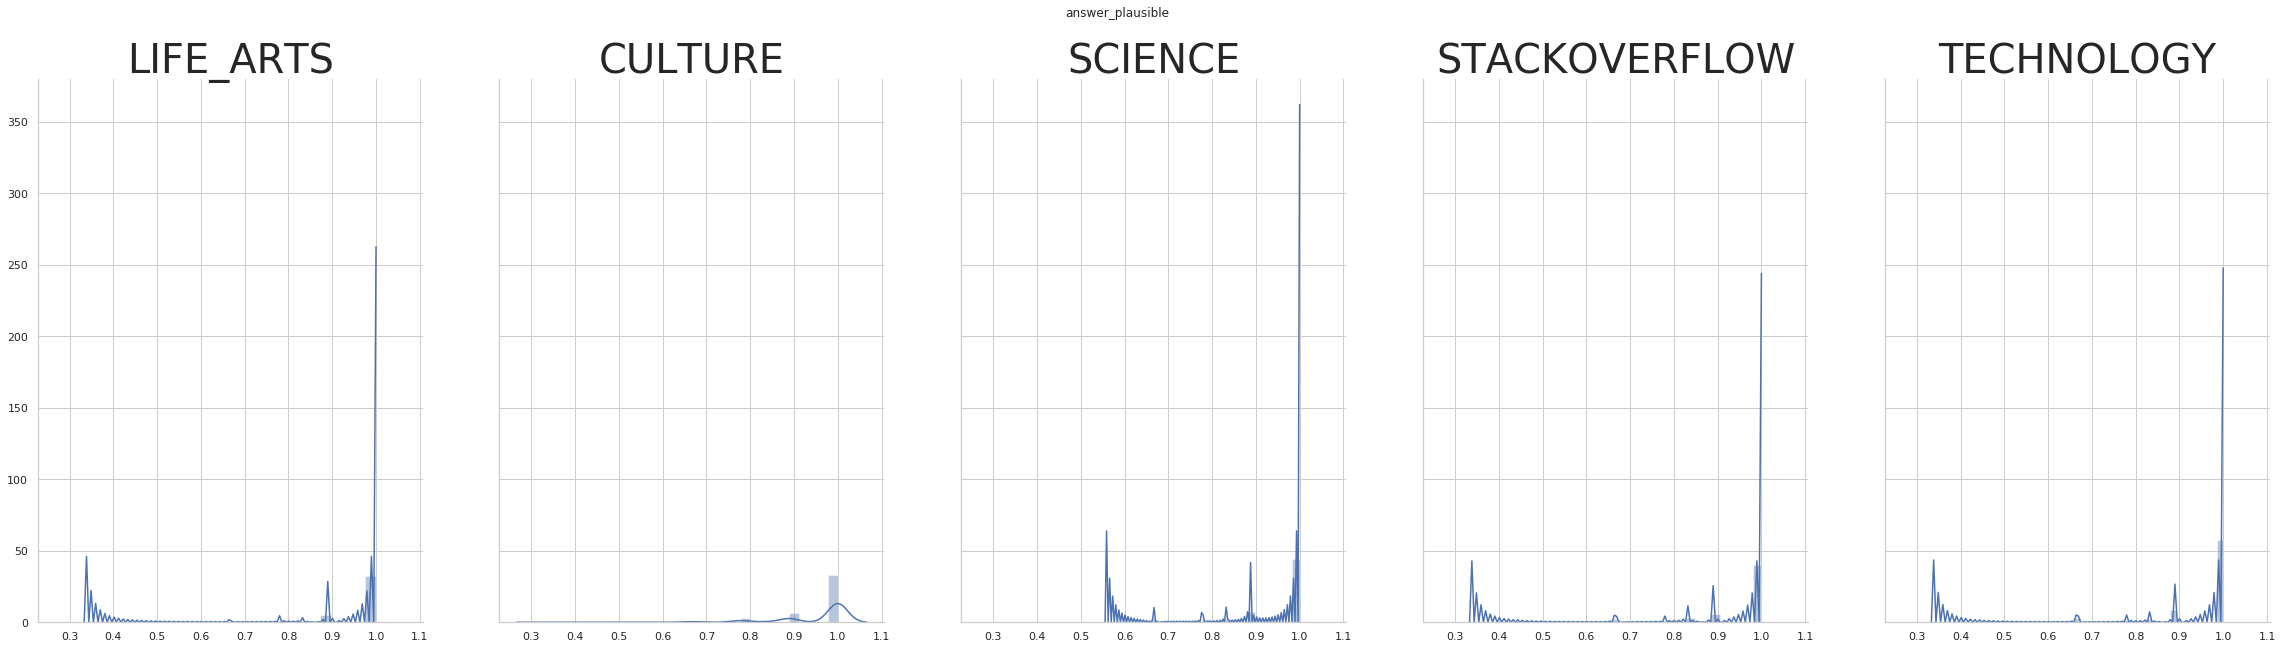

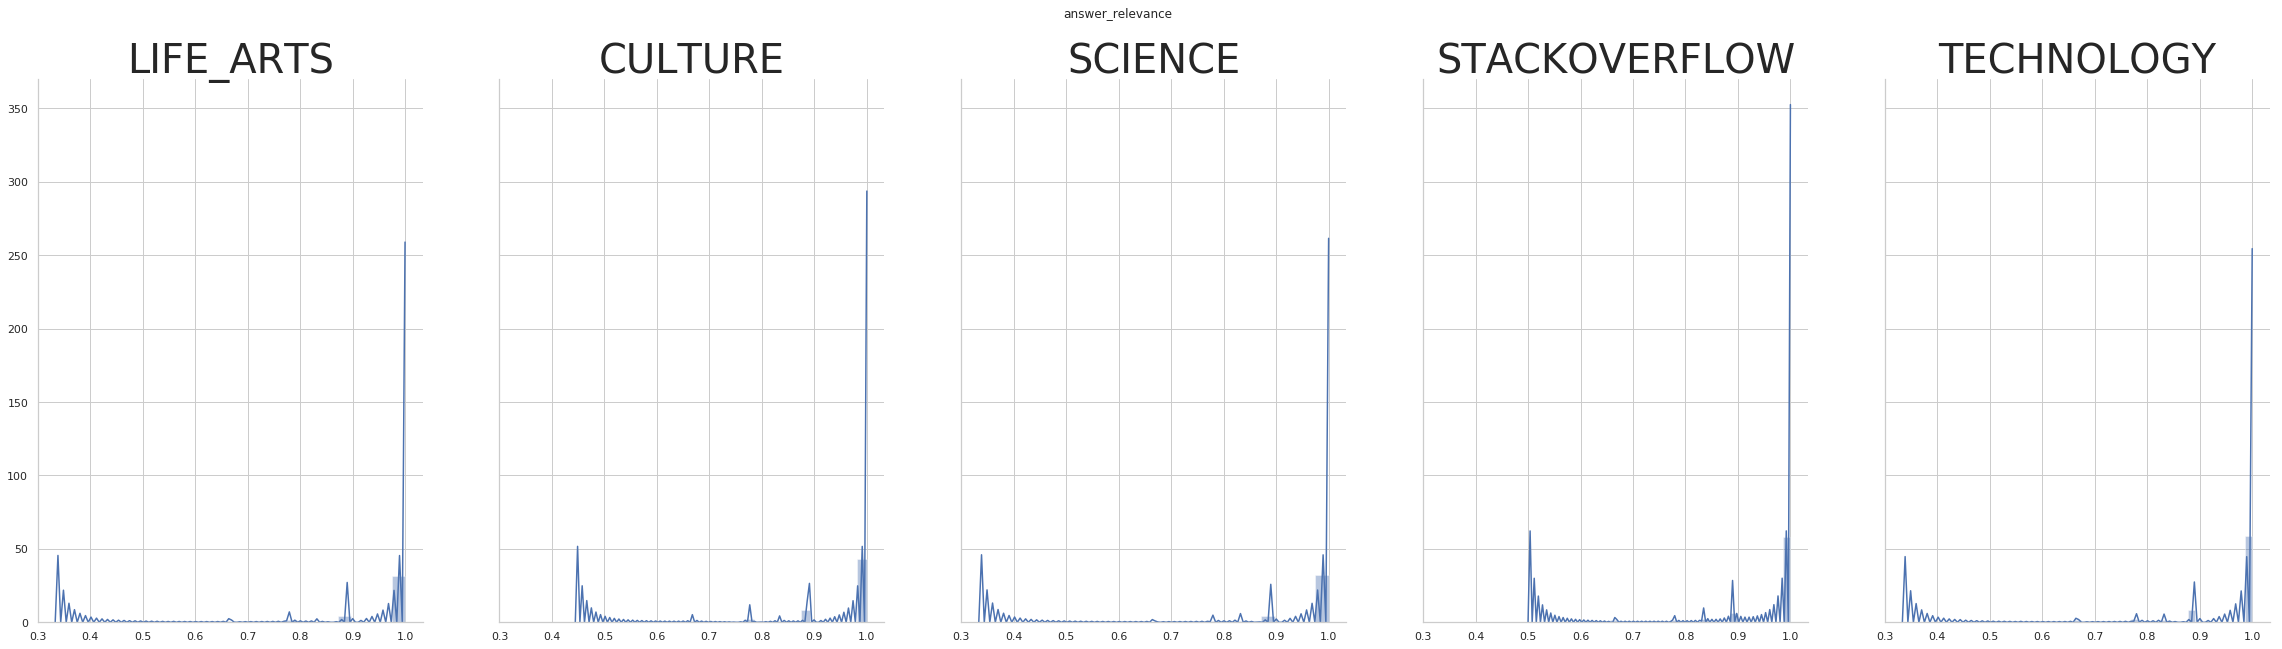

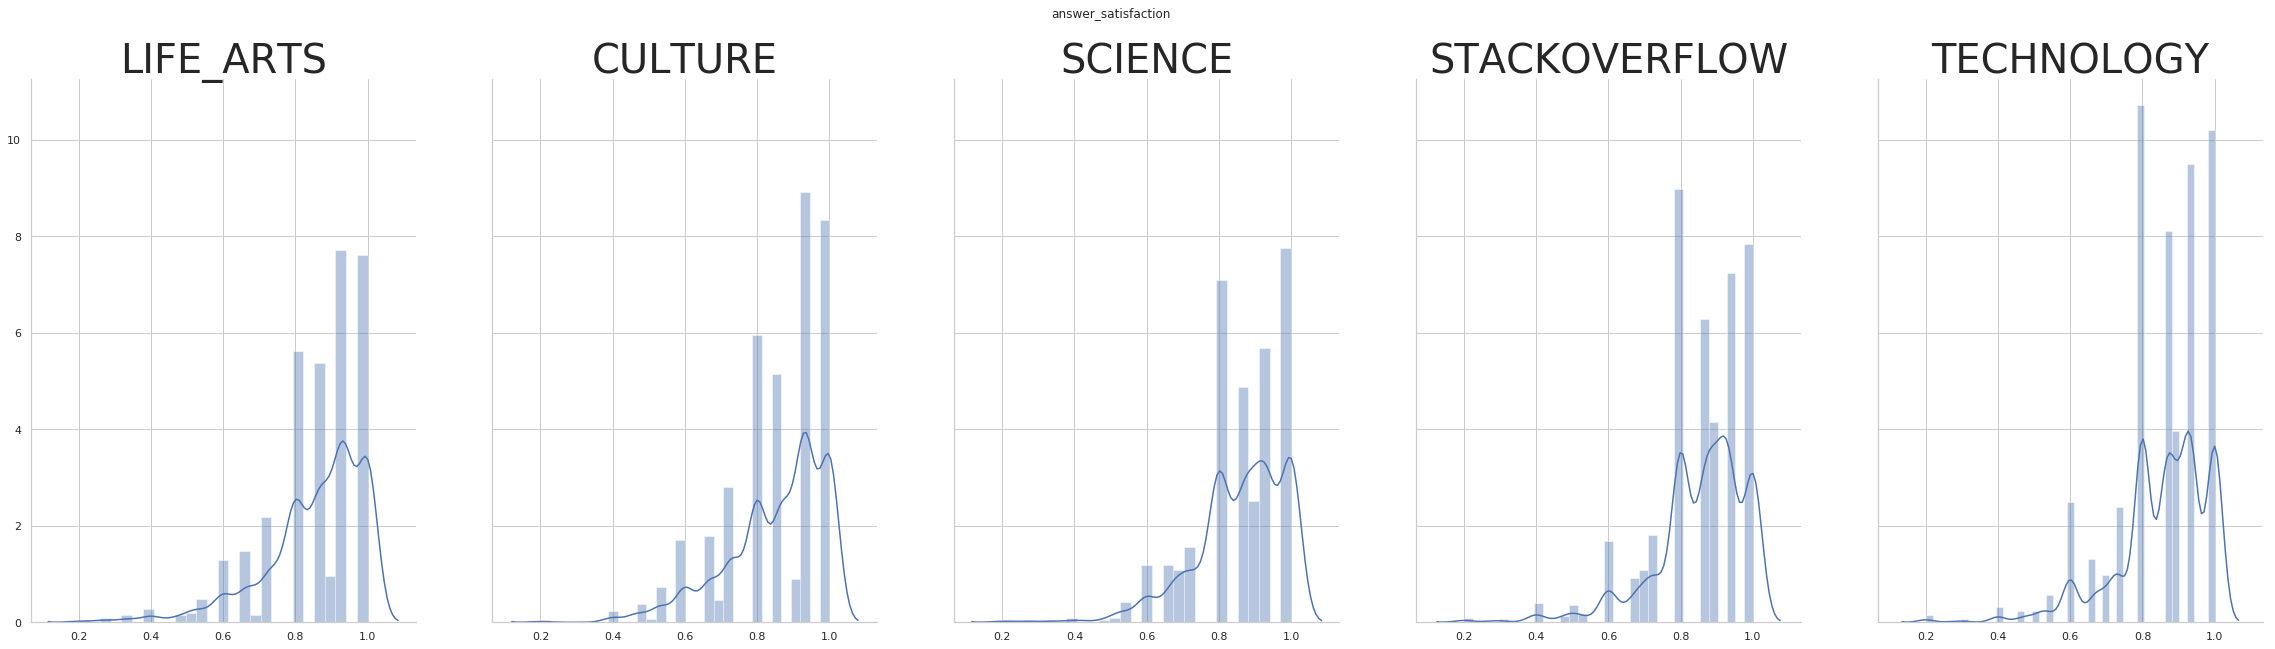

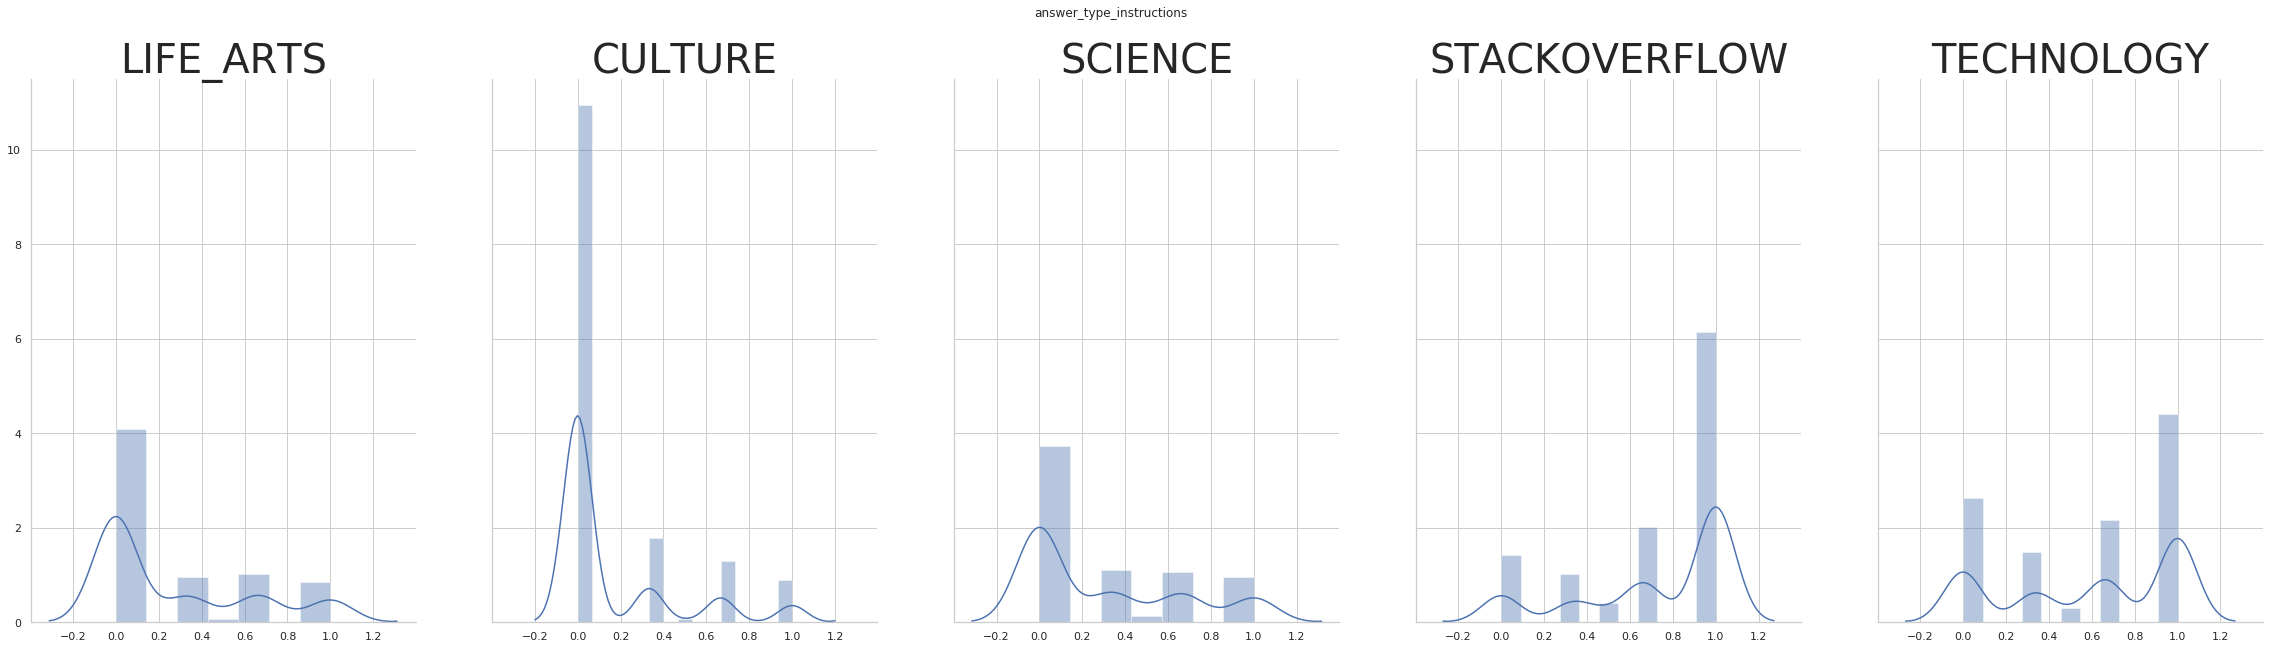

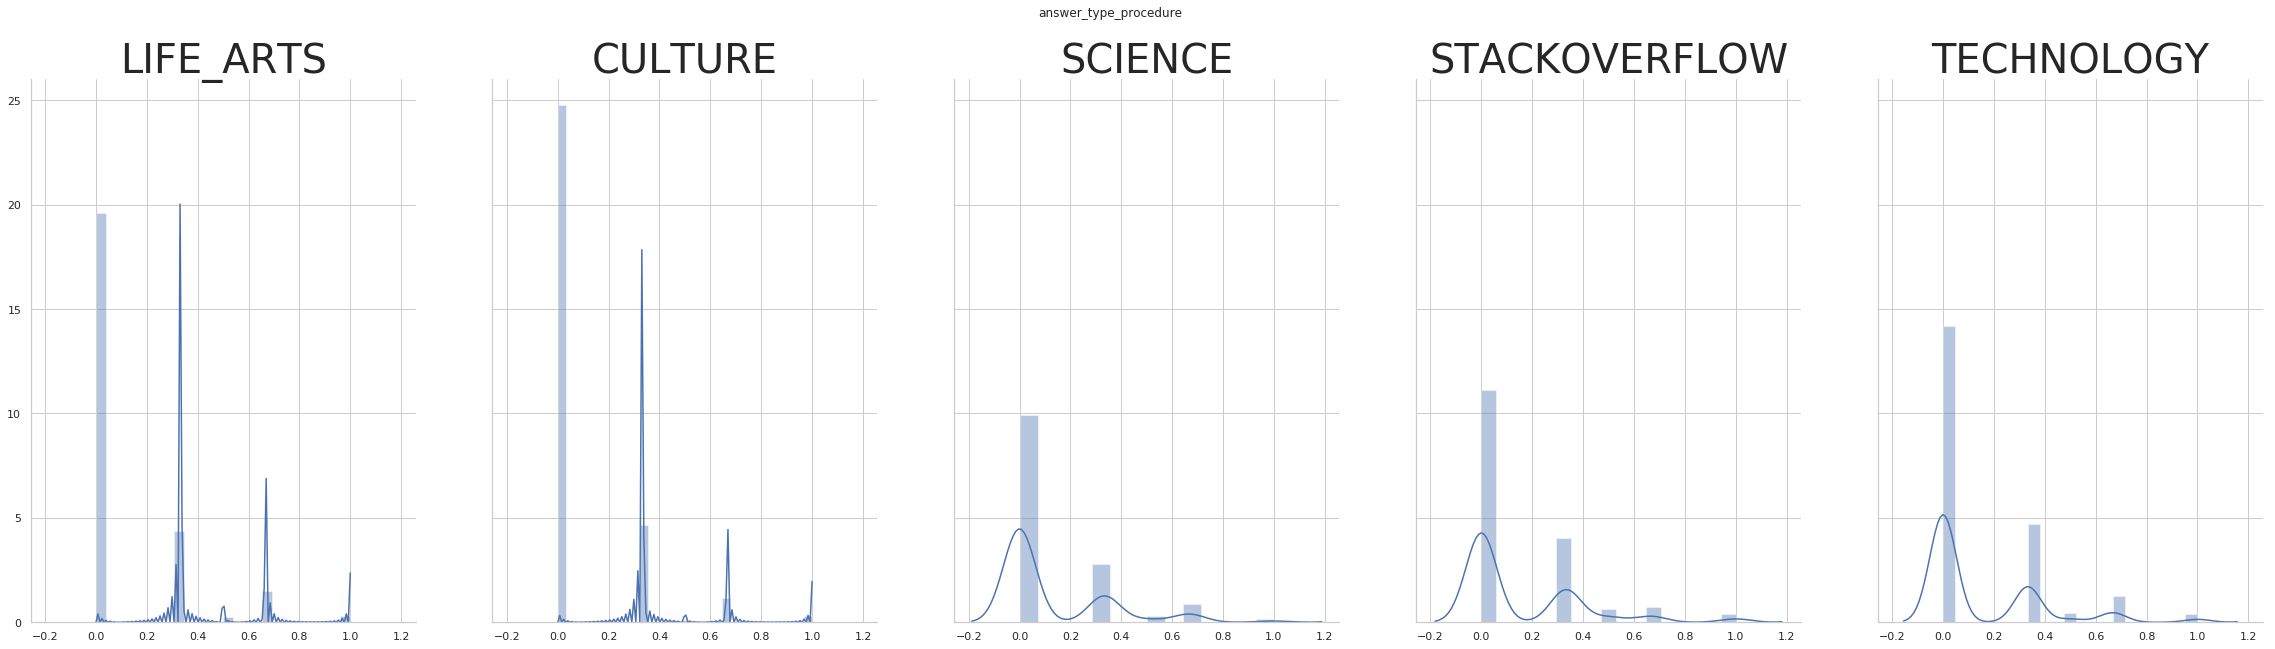

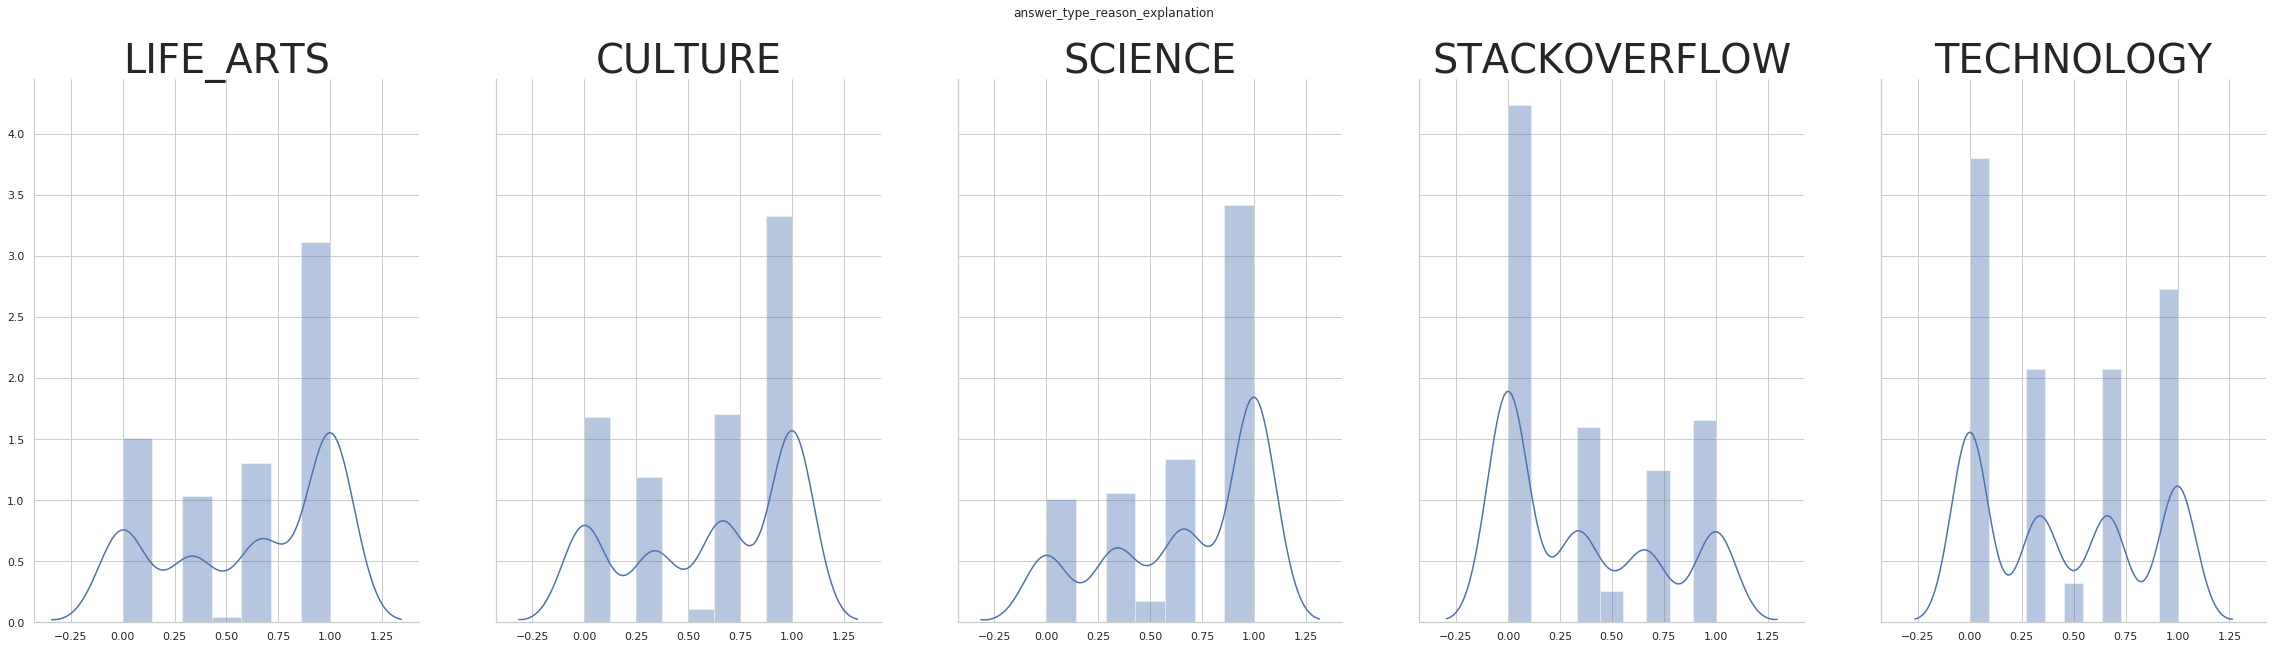

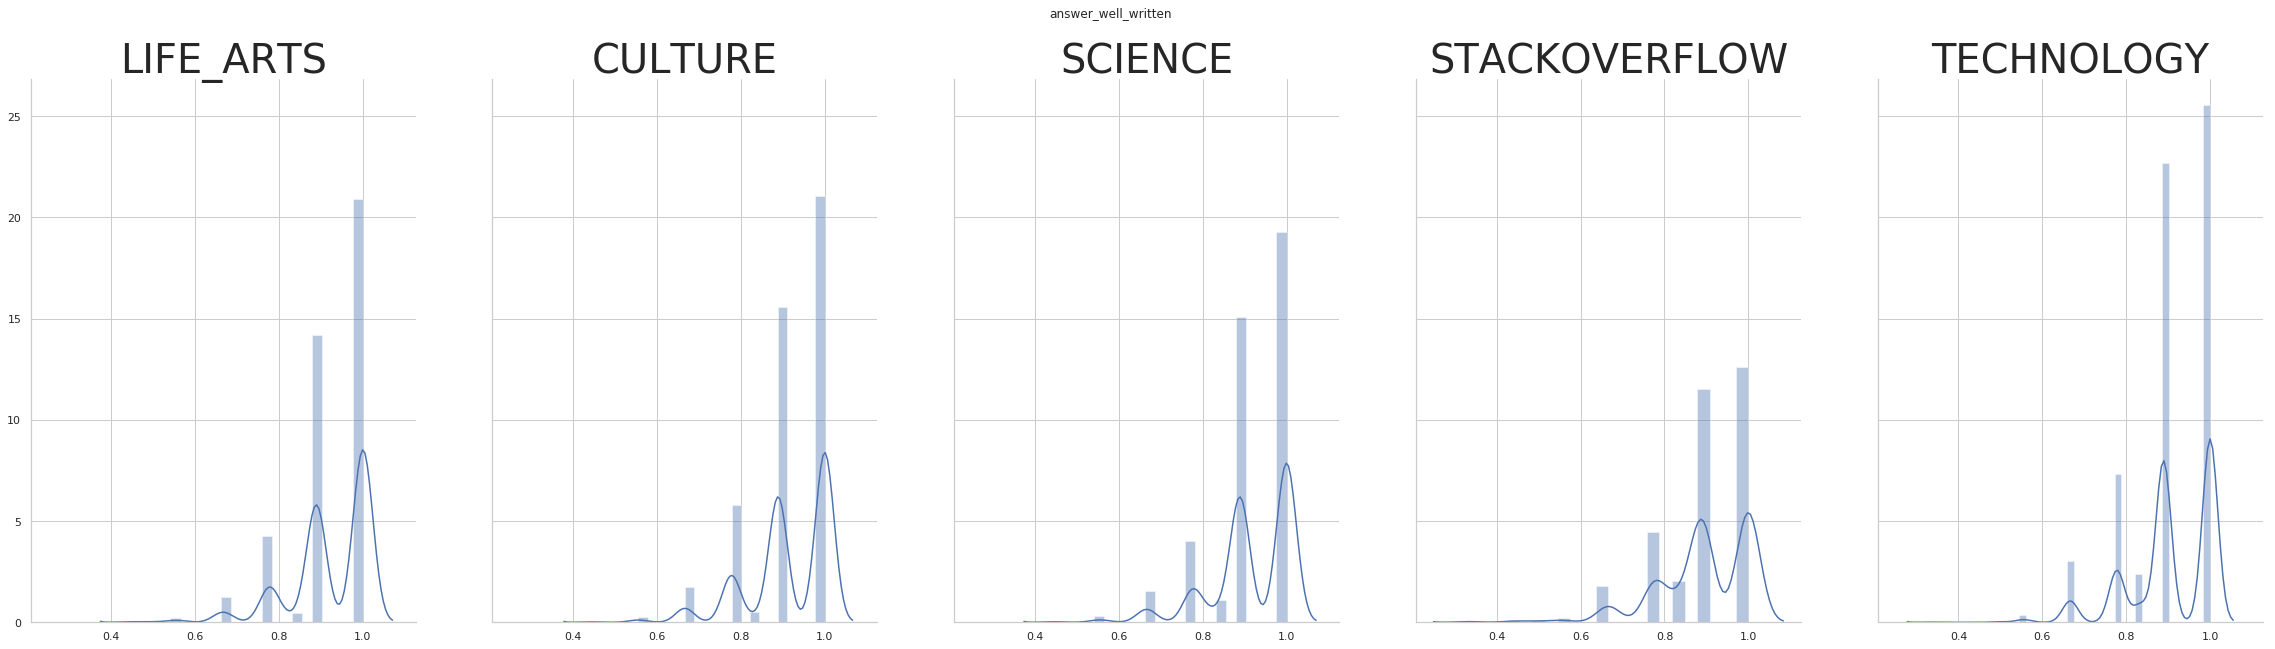

In [4]:
for col in answer_target_cols:
    fig, axes = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(40, 10))
    fig.suptitle(col) 
    axes = axes.flatten()
    sns.distplot(train[train['category'] == 'LIFE_ARTS'][col], ax=axes[0], axlabel=False).set_title('LIFE_ARTS')
    sns.distplot(train[train['category'] == 'CULTURE'][col], ax=axes[1], axlabel=False).set_title('CULTURE')
    sns.distplot(train[train['category'] == 'SCIENCE'][col], ax=axes[2], axlabel=False).set_title('SCIENCE')
    sns.distplot(train[train['category'] == 'STACKOVERFLOW'][col], ax=axes[3], axlabel=False).set_title('STACKOVERFLOW')
    sns.distplot(train[train['category'] == 'TECHNOLOGY'][col], ax=axes[4], axlabel=False).set_title('TECHNOLOGY')
    sns.despine()
    plt.show()

# Label analysis by text lenght

# Question text lenght analysis

In [5]:
train['question_title_wordCnt'] = train['question_title'].apply(lambda x : len(x.split(' ')))
train['question_body_wordCnt'] = train['question_body'].apply(lambda x : len(x.split(' ')))
train['answer_wordCnt'] = train['answer'].apply(lambda x : len(x.split(' ')))

g = sns.PairGrid(train, x_vars=['question_title_wordCnt', 'question_body_wordCnt', 'answer_wordCnt'], y_vars=question_target_cols, height=15)
g = g.map(plt.scatter)
sns.despine()
plt.show()

# Answer text lenght analysis

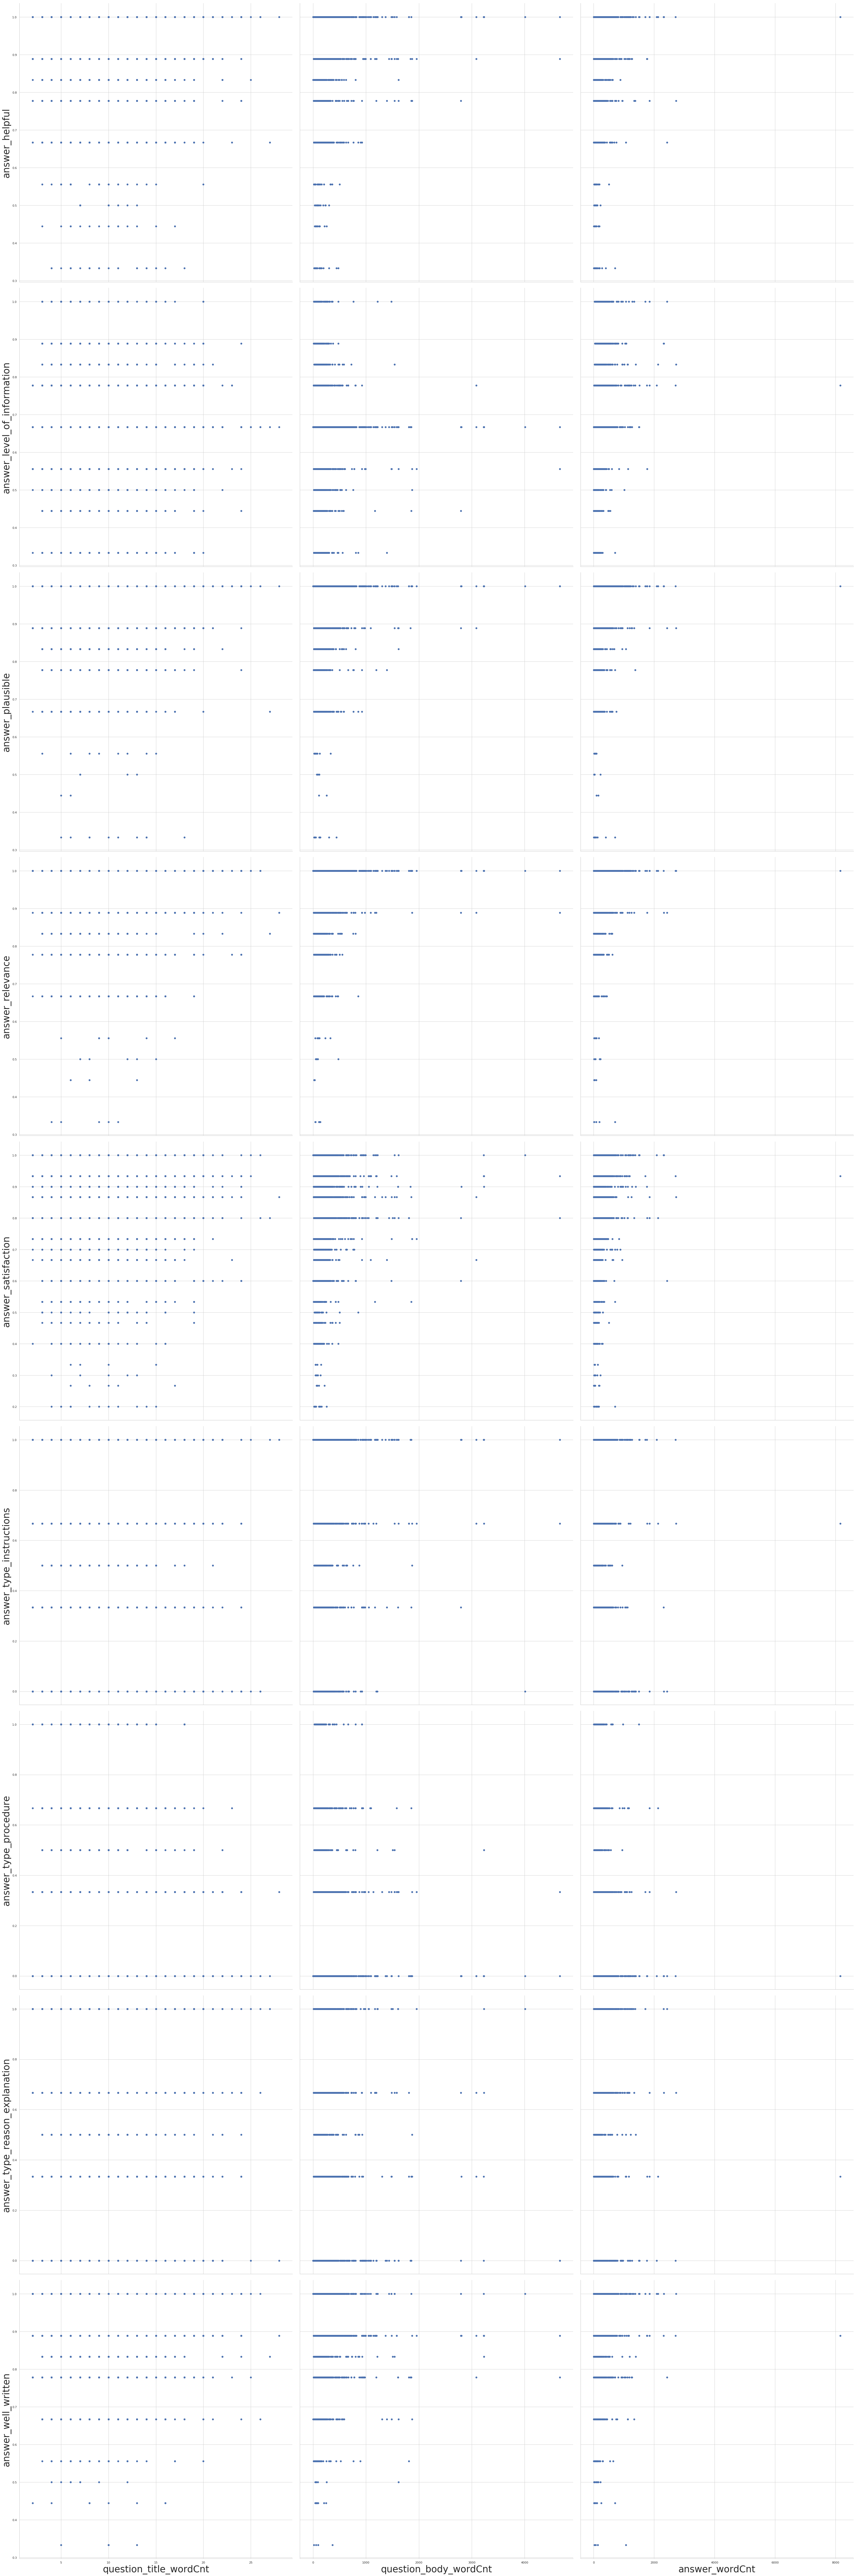

In [6]:
g = sns.PairGrid(train, x_vars=['question_title_wordCnt', 'question_body_wordCnt', 'answer_wordCnt'], y_vars=answer_target_cols, height=15)
g = g.map(plt.scatter)
sns.despine()
plt.show()